In [844]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from Masterplot import DataInput, DataInputFromWebpage, save_all_csvs
import requests
from collections import OrderedDict
import plotly.express as px
import pymysql.cursors
from sqlalchemy import create_engine, MetaData
from sqlalchemy.schema import CreateTable
from sqlalchemy import text
import getpass

# PL Record Matches 2022-23 (since 1993)

In [1189]:
#Loading Data
df_plmatches = pd.read_csv('/Users/ismaelcisse/Desktop/Final Project/premier-league-matches.csv')

In [1254]:
df_plmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


In [1255]:
df_plmatches.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [846]:
df_plmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


In [970]:
pl_df["Home"].unique()

array(['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace',
       'Arsenal', 'Ipswich Town', 'Everton', 'Southampton', 'Chelsea',
       "Nott'ham Forest", 'Manchester City', 'Blackburn', 'Wimbledon',
       'Tottenham', 'Liverpool', 'Aston Villa', 'Oldham Athletic',
       'Middlesbrough', 'Norwich City', 'QPR', 'Manchester Utd',
       'Sheffield Weds', 'Newcastle Utd', 'West Ham', 'Swindon Town',
       'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
       'Birmingham City', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

In [974]:
#Changing name of some football Club

In [986]:
name_changes_pl = {"Arsenal":"Arsenal FC",'Brighton':"Brighton & Hove Albion",
                   "Southampton":"Southampton FC",'Chelsea':"Chelsea FC",
                   'Everton':"Everton FC",'Fulham':"Fulham FC",'Liverpool':"Liverpool FC",
                   'Newcastle Utd':"Newcastle United",'Brentford':"Brentford FC",'Tottenham':"Tottenham Hotspurs",
                   'West Ham':"West Ham United",'Wolves':"Wolverhampton Wanderers",'Manchester Utd':"Manchester United",
                   "Nott'ham Forest":"Nottingham Forest","West Ham":"West Ham United"
    }


In [990]:
pl_df["Home"].replace(to_replace=name_changes_pl, inplace= True)

In [989]:
pl_df["Away"].replace(to_replace=name_changes_pl, inplace= True)

In [992]:
pl_df["Home"].unique()
pl_df["Away"].unique()

array(['Middlesbrough', 'Wimbledon', 'Manchester United', 'Blackburn',
       'Norwich City', 'Aston Villa', 'Sheffield Weds',
       'Tottenham Hotspurs', 'Oldham Athletic', 'Liverpool FC', 'QPR',
       'Arsenal FC', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
       'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea FC',
       'Southampton FC', 'Everton FC', 'Nottingham Forest',
       'Swindon Town', 'West Ham United', 'Newcastle United',
       'Leicester City', 'Bolton', 'Derby County', 'Sunderland',
       'Barnsley', 'Charlton Ath', 'Bradford City', 'Watford',
       'Fulham FC', 'West Brom', 'Birmingham City',
       'Wolverhampton Wanderers', 'Portsmouth', 'Wigan Athletic',
       'Reading', 'Stoke City', 'Hull City', 'Burnley', 'Blackpool',
       'Swansea City', 'Cardiff City', 'Bournemouth', 'Huddersfield',
       'Brighton & Hove Albion', 'Brentford FC'], dtype=object)

In [1001]:
home_goals = pd.pivot_table(pl_df, values='HomeGoals', index='Home', columns='Away',aggfunc='sum')
home_goals = home_goals.sum()
away_goals = pd.pivot_table(pl_df, values='AwayGoals', index='Away', columns='Home',aggfunc='sum')
away_goals = away_goals.sum()
num_goals = pd.concat([home_goals, away_goals], axis=1)
num_goals = num_goals.rename(columns={0: 'Home Goals', 1: 'Away Goals'})

In [1002]:
pd.pivot_table(pl_df, values='HomeGoals', index='Home', columns='Away', aggfunc='sum').head()

Away,Arsenal FC,Aston Villa,Barnsley,Birmingham City,Blackburn,Blackpool,Bolton,Bournemouth,Bradford City,Brentford FC,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspurs,Watford,West Brom,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Home,,,,,,,,,,,,,,,,,,,,,
Arsenal FC,NaN,55.0,5.0,12.0,40.0,6.0,30.0,17.0,4.0,3.0,...,33.0,9.0,1.0,63.0,18.0,30.0,54.0,21.0,13.0,17.0
Aston Villa,24.0,NaN,0.0,12.0,24.0,3.0,26.0,5.0,3.0,5.0,...,16.0,4.0,5.0,31.0,10.0,17.0,29.0,4.0,19.0,8.0
Barnsley,0.0,0.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN
Birmingham City,5.0,7.0,NaN,NaN,12.0,2.0,11.0,NaN,NaN,NaN,...,9.0,NaN,NaN,9.0,NaN,7.0,6.0,6.0,NaN,5.0
Blackburn,21.0,28.0,2.0,12.0,NaN,2.0,21.0,NaN,NaN,NaN,...,9.0,4.0,3.0,15.0,3.0,7.0,31.0,12.0,14.0,12.0


In [1000]:
pd.pivot_table(pl_df, values='FTR', index='Home', columns='Away', aggfunc=len).head()

Away,Arsenal FC,Aston Villa,Barnsley,Birmingham City,Blackburn,Blackpool,Bolton,Bournemouth,Bradford City,Brentford FC,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspurs,Watford,West Brom,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Home,,,,,,,,,,,,,,,,,,,,,
Arsenal FC,NaN,28.0,1.0,7.0,18.0,1.0,13.0,6.0,2.0,2.0,...,16.0,7.0,1.0,31.0,8.0,13.0,27.0,8.0,8.0,9.0
Aston Villa,28.0,NaN,1.0,7.0,18.0,1.0,13.0,3.0,2.0,2.0,...,15.0,5.0,1.0,28.0,5.0,11.0,24.0,8.0,8.0,8.0
Barnsley,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
Birmingham City,7.0,7.0,NaN,NaN,7.0,1.0,7.0,NaN,NaN,NaN,...,5.0,NaN,NaN,7.0,NaN,4.0,5.0,4.0,NaN,3.0
Blackburn,18.0,18.0,1.0,7.0,NaN,1.0,13.0,NaN,NaN,NaN,...,9.0,1.0,1.0,18.0,1.0,6.0,14.0,7.0,7.0,4.0


In [993]:
#Changing Type of the columns
num_goals.dtypes

Home Goals    float64
Away Goals    float64
dtype: object

In [994]:
for column in num_goals.columns:
    if num_goals[column].dtype == 'float64':
        num_goals[column] = num_goals[column].astype(int)

In [1003]:
num_goals.head()

,Home Goals,Away Goals
Arsenal FC,677.0,514.0
Aston Villa,801.0,598.0
Barnsley,47.0,35.0
Birmingham City,220.0,140.0
Blackburn,526.0,381.0


In [996]:
not_in_pl = ['Coventry City', 'Sheffield Utd','Ipswich Town','Blackburn', 'Wimbledon','Oldham Athletic',
       'Middlesbrough', 'Norwich City', 'QPR',
       'Sheffield Weds', 'Swindon Town','Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford',
       'Birmingham City', 'West Brom', 'Portsmouth',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Huddersfield','Bradford City']

num_goals_pl23 = num_goals.drop(labels=not_in_pl, axis=0)

In [997]:
num_goals_pl23

,Home Goals,Away Goals
Arsenal,677,514
Aston Villa,801,598
Bournemouth,225,176
Brentford,63,39
Brighton,165,146
Chelsea,668,504
Crystal Palace,429,346
Everton,871,667
Fulham,492,392
Leeds United,457,327


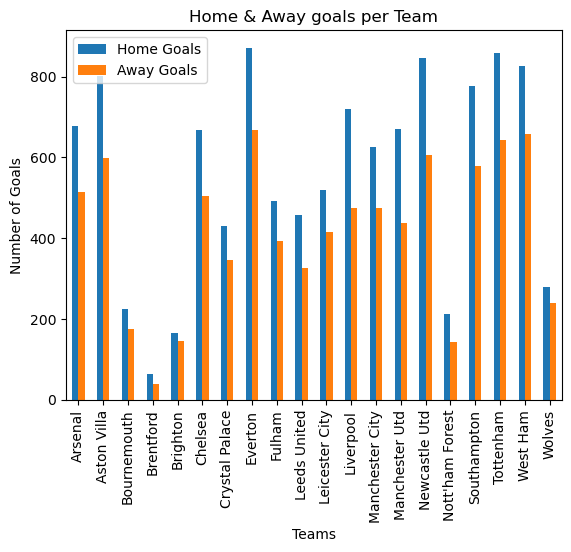

<Figure size 9000x9000 with 0 Axes>

In [998]:
num_goals_pl23.plot(kind='bar', stacked=False,
        title='Home & Away goals per Team')
plt.xlabel("Teams")
plt.ylabel("Number of Goals")
plt.figure(figsize=(90,90))
plt.show()

In [813]:
home_results.head()

FTR,W,D,L
Away,,,
Arsenal,263,156,176
Aston Villa,152,150,236
Barnsley,3,1,15
Birmingham City,23,36,74
Blackburn,93,99,156


In [1230]:
away_results.head()

FTR,L,D,W
Home,,,
Arsenal,79,134,382
Aston Villa,165,153,220
Barnsley,8,4,7
Birmingham City,37,46,50
Blackburn,94,85,169


In [796]:
#home_results teams actually in PL
home_results_pl23 = home_results.drop(labels=not_in_pl, axis=0)

In [1218]:
home_results_pl23

FTR,W,D,L,W/AwayMatches,D/AwayMatches,L/AwayMatches,%L/AwayMatches,%W/AwayMatches
Away,,,,,,,,
Arsenal,263,156,176,0.442017,0.262185,0.262185,0.262185,0.009875
Aston Villa,152,150,236,0.282528,0.278810,0.278810,0.278810,0.009752
Bournemouth,27,20,67,0.236842,0.175439,0.175439,0.175439,0.009688
Brentford,11,11,16,0.289474,0.289474,0.289474,0.289474,0.009760
Brighton,29,33,52,0.254386,0.289474,0.289474,0.289474,0.009715
Chelsea,269,145,181,0.452101,0.243697,0.243697,0.243697,0.009880
Crystal Palace,72,70,128,0.266667,0.259259,0.259259,0.259259,0.009732
Everton,153,175,267,0.257143,0.294118,0.294118,0.294118,0.009719
Fulham,49,93,162,0.161184,0.305921,0.305921,0.305921,0.009505


In [1226]:
home_results_pl23.drop(['%W/AwayMatches','%L/AwayMatches'],axis=1)

FTR,W,D,L,W/AwayMatches,D/AwayMatches,L/AwayMatches
Away,,,,,,
Arsenal,263,156,176,44.201681,26.218487,26.218487
Aston Villa,152,150,236,28.252788,27.881041,27.881041
Bournemouth,27,20,67,23.684211,17.543860,17.543860
Brentford,11,11,16,28.947368,28.947368,28.947368
Brighton,29,33,52,25.438596,28.947368,28.947368
Chelsea,269,145,181,45.210084,24.369748,24.369748
Crystal Palace,72,70,128,26.666667,25.925926,25.925926
Everton,153,175,267,25.714286,29.411765,29.411765
Fulham,49,93,162,16.118421,30.592105,30.592105


In [ ]:
#Add Share part

In [1222]:
home_results_pl23['W/AwayMatches'] = (home_results_pl23['W'] / (home_results_pl23['D'] + 
                                                               home_results_pl23['L'] + 
                                                               home_results_pl23['W']))*100

In [1223]:
home_results_pl23['D/AwayMatches'] = (home_results_pl23['D'] / (home_results_pl23['D'] + 
                                                               home_results_pl23['L'] 
                                                               + home_results_pl23['W']))*100

In [1224]:
home_results_pl23['L/AwayMatches'] = (home_results_pl23['D'] / (home_results_pl23['D'] + 
                                                               home_results_pl23['L'] 
                                                               + home_results_pl23['W']))*100

In [1206]:
home_results_pl23['W/AwayMatches']

Away
Arsenal            0.792169
Aston Villa        0.393782
Bournemouth        0.310345
Brentford          0.407407
Brighton           0.341176
Chelsea            0.825153
Crystal Palace     0.363636
Everton            0.346154
Fulham             0.192157
Leeds United       0.433498
Leicester City     0.371308
Liverpool          0.734694
Manchester City    0.689189
Manchester Utd     1.080420
Newcastle Utd      0.343358
Nott'ham Forest    0.282609
Southampton        0.276243
Tottenham          0.494975
West Ham           0.308861
Wolves             0.276119
Name: W/AwayMatches, dtype: float64

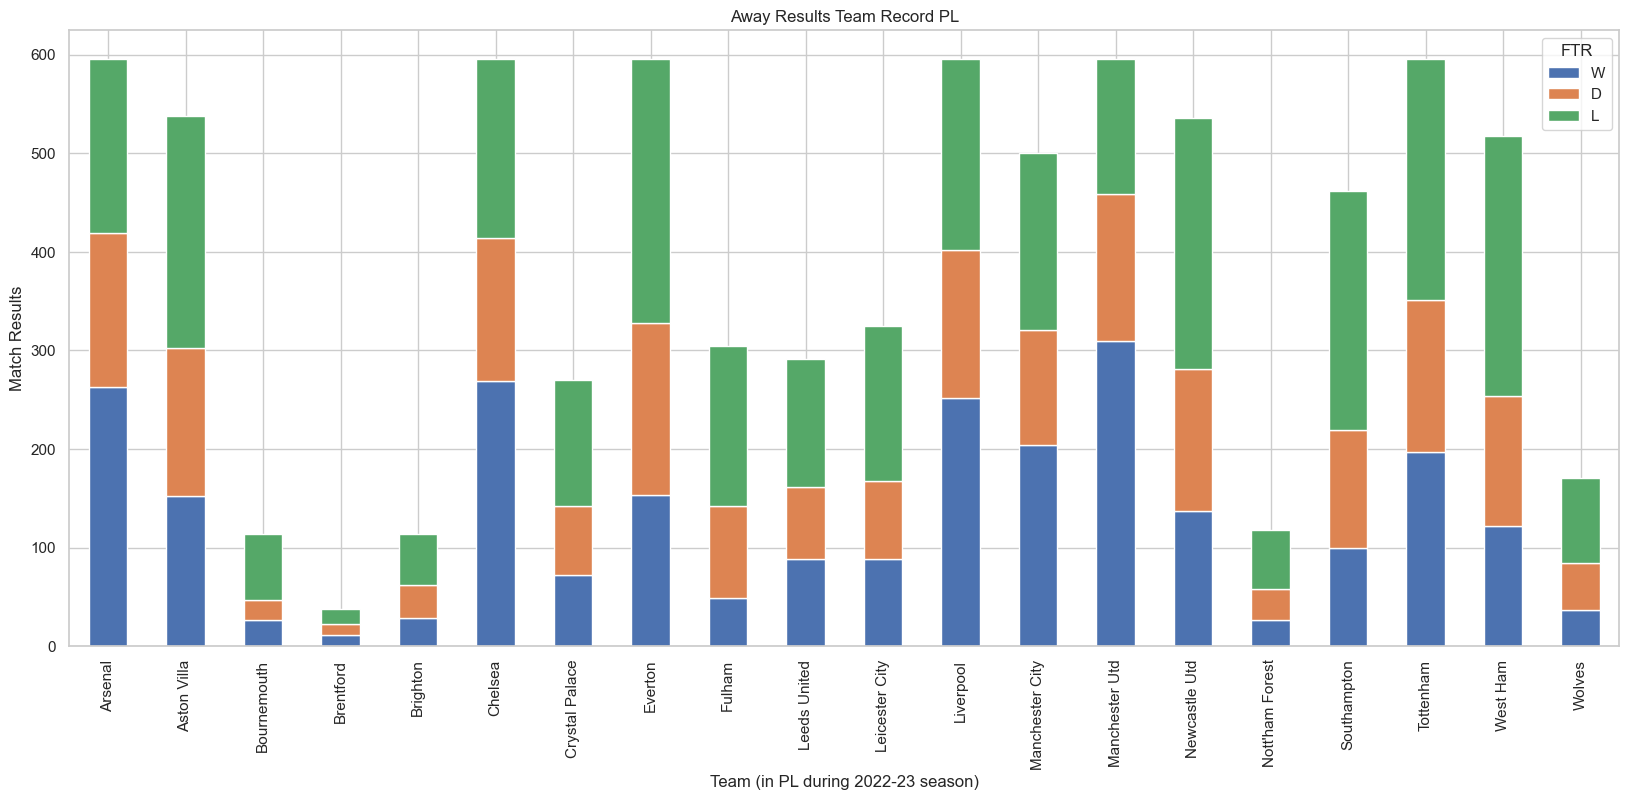

In [1202]:
home_results_pl23.plot(kind='bar', stacked=True,
        title='Away Results Team Record PL')
plt.xlabel("Team (in PL during 2022-23 season)")
plt.ylabel("Match Results")
plt.show()

In [798]:
#away_results teams actually in PL
away_results_pl23 = away_results.drop(labels=not_in_pl, axis=0)

In [1232]:
away_results_pl23

FTR,L,D,W
Home,,,
Arsenal,79,134,382
Aston Villa,165,153,220
Bournemouth,45,29,40
Brentford,11,10,17
Brighton,37,40,37
Chelsea,85,150,360
Crystal Palace,115,71,84
Everton,165,157,273
Fulham,108,68,128


In [739]:
home_results = pd.pivot_table(pl_df, values='Away', index='Home', columns='FTR', aggfunc=len)
home_results = home_results.rename(columns={'H': 'W', 'A': 'L'})
away_results = pd.pivot_table(pl_df, values='Home', index='Away', columns='FTR', aggfunc=len)
away_results = away_results.rename(columns={'A': 'W', 'H': 'L'})
results = home_results + away_results
results = results.T

results.head()

Home,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn,Blackpool,Bolton,Bournemouth,Bradford City,Brentford,...,Sunderland,Swansea City,Swindon Town,Tottenham,Watford,West Brom,West Ham,Wigan Athletic,Wimbledon,Wolves
FTR,,,,,,,,,,,,,,,,,,,,,
D,290,303,5,82,184,9,128,49,20,21,...,159,66,15,287,66,139,260,76,94,86
L,255,401,23,111,250,19,217,112,42,27,...,296,118,22,383,165,238,428,143,123,155
W,645,372,10,73,262,10,149,67,14,28,...,153,82,5,520,73,117,346,85,99,101


In [802]:
home_results = pd.pivot_table(pl_df, values='Home', index='Away', columns='FTR', aggfunc=len)
home_results = home_results.rename(columns={'A': 'W', 'H': 'L'})
away_results = pd.pivot_table(pl_df, values='Away', index='Home', columns='FTR', aggfunc=len)
away_results = away_results.rename(columns={'H': 'W', 'A': 'L'})
results1 = home_results + away_results
results1 = results1.T

results1

Away,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn,Blackpool,Bolton,Bournemouth,Bradford City,Brentford,...,Sunderland,Swansea City,Swindon Town,Tottenham,Watford,West Brom,West Ham,Wigan Athletic,Wimbledon,Wolves
FTR,,,,,,,,,,,,,,,,,,,,,
D,290,303,5,82,184,9,128,49,20,21,...,159,66,15,287,66,139,260,76,94,86
L,255,401,23,111,250,19,217,112,42,27,...,296,118,22,383,165,238,428,143,123,155
W,645,372,10,73,262,10,149,67,14,28,...,153,82,5,520,73,117,346,85,99,101


Text(0, 0.5, 'Match Results')

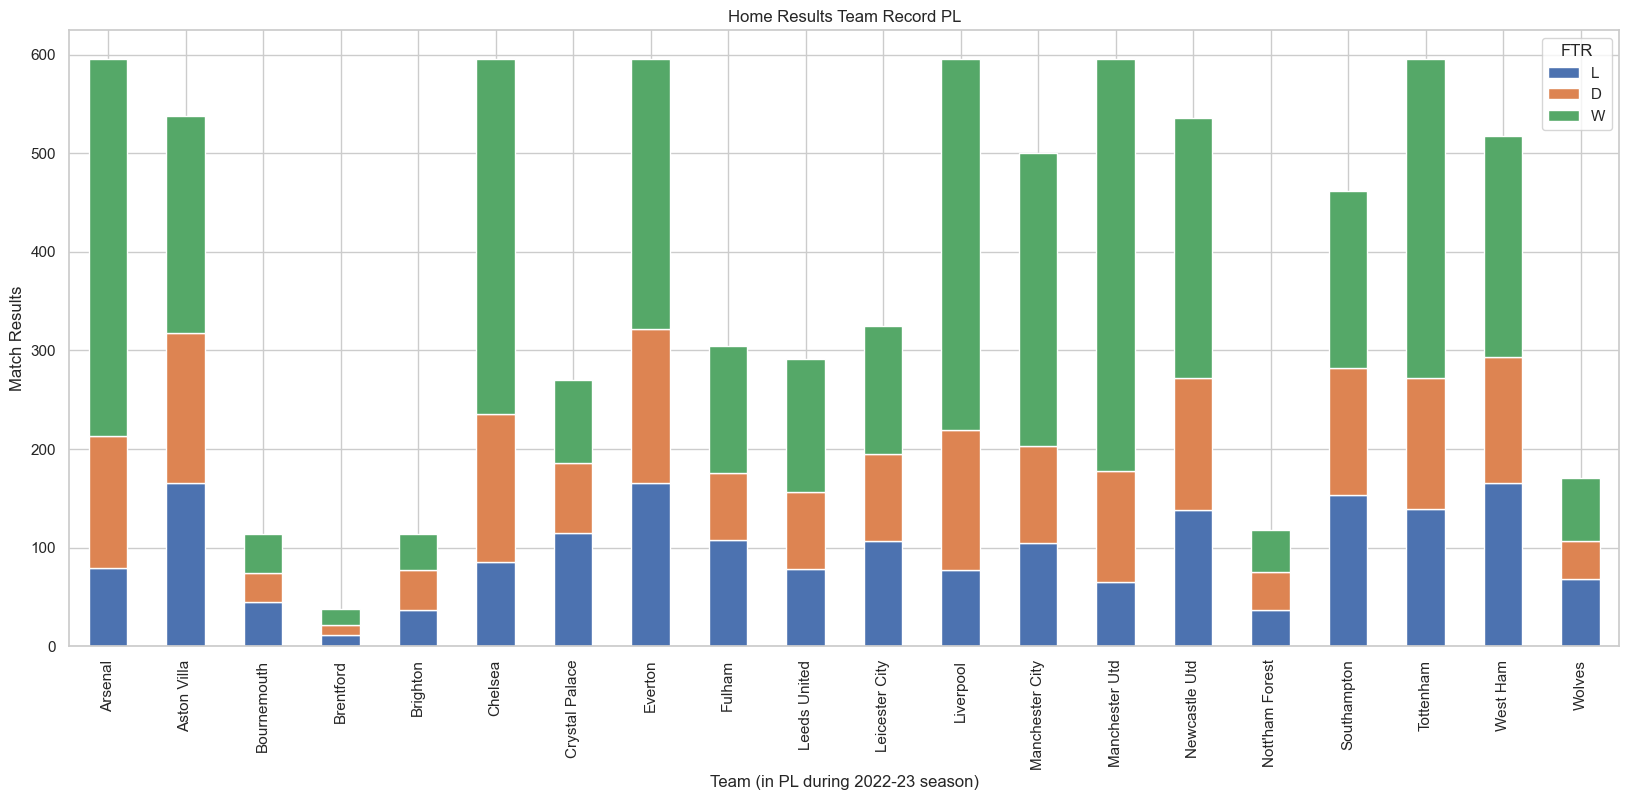

In [1234]:
#home_results = pd.pivot_table(df, values='Home', index='Away', columns='FTR', aggfunc=len)
#away_results = pd.pivot_table(df, values='Away', index='Home', columns='FTR', aggfunc=len)
#overall = pd.concat([home_results['H'], away_results['A']], axis=1)
#overall = overall.rename(columns={'H': 'Home Wins', 'A': 'Away Wins'})
#overall['team_colours'] = team_colours.values()

#overall.head()
away_results_pl23.plot(kind='bar', stacked=True,
        title='Home Results Team Record PL')
plt.xlabel("Team (in PL during 2022-23 season)")
plt.ylabel("Match Results")


In [1198]:
# Collecting Teams present during Premier League 2022-2023 Season
df_plmatches23 = pl_df.loc[(pl_df["Season_End_Year"] == 2023) & (pl_df["Wk"] == 1)]

In [1199]:
df_plmatches23

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
11646,2023,1,2022-08-05,Crystal Palace,0,2,Arsenal FC,A
11647,2023,1,2022-08-06,Fulham FC,2,2,Liverpool FC,D
11648,2023,1,2022-08-06,Tottenham Hotspurs,4,1,Southampton FC,H
11649,2023,1,2022-08-06,Newcastle United,2,0,Nottingham Forest,H
11650,2023,1,2022-08-06,Leeds United,2,1,Wolverhampton Wanderers,H
11651,2023,1,2022-08-06,Bournemouth,2,0,Aston Villa,H
11652,2023,1,2022-08-06,Everton FC,0,1,Chelsea FC,A
11653,2023,1,2022-08-07,Leicester City,2,2,Brentford FC,D
11654,2023,1,2022-08-07,Manchester United,1,2,Brighton & Hove Albion,A
11655,2023,1,2022-08-07,West Ham United,0,2,Manchester City,A


In [963]:
df_plmatches23["Home"].unique()

array(['Crystal Palace', 'Fulham', 'Tottenham', 'Newcastle Utd',
       'Leeds United', 'Bournemouth', 'Everton', 'Leicester City',
       'Manchester Utd', 'West Ham'], dtype=object)

In [964]:
df_plmatches23["Away"].unique()

array(['Arsenal', 'Liverpool', 'Southampton', "Nott'ham Forest", 'Wolves',
       'Aston Villa', 'Chelsea', 'Brentford', 'Brighton',
       'Manchester City'], dtype=object)

In [666]:
#Collecting Teams names present during Premier League 2022-2023 Season to match with other table
team_names = pl_df["Home"].unique()
team_names

array(['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace',
       'Arsenal', 'Ipswich Town', 'Everton', 'Southampton', 'Chelsea',
       "Nott'ham Forest", 'Manchester City', 'Blackburn', 'Wimbledon',
       'Tottenham', 'Liverpool', 'Aston Villa', 'Oldham Athletic',
       'Middlesbrough', 'Norwich City', 'QPR', 'Manchester Utd',
       'Sheffield Weds', 'Newcastle Utd', 'West Ham', 'Swindon Town',
       'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
       'Birmingham City', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

In [363]:
# Deadline Week Summer Transfer Window - 08/31/22
pl_df.loc[(pl_df["Season_End_Year"] == 2023) & (pl_df["Wk"] == 5)]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
11686,2023,5,2022-08-30,Fulham,2,1,Brighton,H
11687,2023,5,2022-08-30,Crystal Palace,1,1,Brentford,D
11688,2023,5,2022-08-30,Southampton,2,1,Chelsea,H
11689,2023,5,2022-08-30,Leeds United,1,1,Everton,D
11690,2023,5,2022-08-31,Bournemouth,0,0,Wolves,D
11691,2023,5,2022-08-31,Manchester City,6,0,Nott'ham Forest,H
11692,2023,5,2022-08-31,Arsenal,2,1,Aston Villa,H
11693,2023,5,2022-08-31,West Ham,1,1,Tottenham,D
11694,2023,5,2022-08-31,Liverpool,2,1,Newcastle Utd,H
11695,2023,5,2022-09-01,Leicester City,0,1,Manchester Utd,A


In [123]:
from bs4 import BeautifulSoup

# History Transfers

In [262]:
import requests # to make the request to the web address
from bs4 import BeautifulSoup as bs # to pull data from HTML
import csv # to put the data in the csv file
import re # to handle regex
import pandas as pd # to show result

In [263]:
def modif_txt(text):
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub('', text)
    return " ".join(text.split())


def format_currency(value):
    value = value.replace('€', '')
    value = value.replace('-', '0')
    value = value.replace('Loan fee:', '')
    value = value.replace('-', '0')
    value = value.replace('?', '0')
    value = value.replace('loan transfer', '0')
    value = value.replace('free transfer', '0')
    
    if value[-1] == 'm':
        value = value.replace('m', '')
        return float(value) 

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return float(value) / 1000
    return value


def loan_transform(value):
    if bool(re.match('loan', value, re.I)):
        bool_value = True
        return bool_value
    else:
        bool_value = False
        return bool_value


def get_data(pages):
    players_list = []
    for page in range(1, pages+1):
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
        url = f'https://www.transfermarkt.com/transfers/saisontransfers/statistik/top/plus/1/galerie/0?saison_id=2022&transferfenster=sommertransfers&land_id=&ausrichtung=&spielerposition_id=&altersklasse=&leihe=&page={page}'
        #print(url)

        html = requests.get(url, headers=headers)
        soup = bs(html.content)
        soup = soup.select('.responsive-table > .grid-view > .items > tbody')[0]

        try:
            for cells in soup.find_all(True, {"class": re.compile("^(even|odd)$")}):
                fee = cells.find_all('td')[16].text
                loan = cells.find_all('td')[16].text
                position = cells.find_all('td')[4].text
                age = cells.find_all('td')[5].text
                market_value = cells.find_all('td')[6].text
                try:
                    country_from = cells.find_all('td')[11].img['title']
                except:
                    country_from = None
                    pass
                league_from = cells.find_all('td')[11].a.text if cells.find_all('td')[11].a != None else 'Without League'
                club_from = cells.find_all('td')[9].img['alt']
                country_to = cells.find_all('td')[15].img['alt']
                league_to = cells.find_all('td')[15].a.text if cells.find_all('td')[15].a != None else 'Without League'
                club_to = cells.find_all('td')[13].img['alt']

                player = {
                    'name': cells.find_all('td')[1].select('td > img')[0]['title'],
                    'position': position,
                    'age': age,
                    'market_value': format_currency(market_value),
                    'country_from': country_from,
                    'league_from': format_text(league_from),
                    'club_from': club_from,
                    'country_to': country_to,
                    'league_to': format_text(league_to),
                    'club_to': club_to,
                    'fee': format_currency(fee),
                    'loan': loan_transform(loan),
                }

                players_list.append(player)
        except IndexError:
            pass

    return players_list

"5. data_to_csv function which receives a list to save a csv output file"

def data_to_csv(data):
    keys = data[0].keys()
    with open('data.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

In [264]:
%%time
data = get_data(80)

CPU times: user 12.2 s, sys: 1.36 s, total: 13.6 s
Wall time: 3min 23s


In [332]:
df = pd.DataFrame(data=data)

In [955]:
df.info()
#No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2000 non-null   object
 1   position      2000 non-null   object
 2   age           2000 non-null   object
 3   market_value  2000 non-null   object
 4   country_from  2000 non-null   object
 5   league_from   2000 non-null   object
 6   club_from     2000 non-null   object
 7   country_to    2000 non-null   object
 8   league_to     2000 non-null   object
 9   club_to       2000 non-null   object
 10  fee           2000 non-null   object
 11  loan          2000 non-null   bool  
dtypes: bool(1), object(11)
memory usage: 174.0+ KB


In [1034]:
df.dtypes
#changing "age",'market_value',fee type from object to integer

name             object
position         object
age              object
market_value    float64
country_from     object
league_from      object
club_from        object
country_to       object
league_to        object
club_to          object
fee              object
loan               bool
dtype: object

In [1024]:
#changing "age",'market_value',fee type from object to integer
df['market_value'].unique()
#Forces us to use regex 
#df[['age', 'market_value','fee']] = df[['age', 'market_value','fee']].astype(int)

array([150.0, 35.0, 40.0, 60.0, 30.0, 70.0, 28.0, 65.0, 45.0, 48.0, 32.0,
       55.0, 50.0, 15.0, 42.0, 25.0, 10.0, 12.0, 33.0, 18.0, 11.0, 27.0,
       20.0, 24.0, 23.0, 19.0, 22.0, 2.0, 8.0, 4.0, 14.0, 17.0, 6.0, 16.0,
       9.0, 1.0, 14.5, 5.0, 13.0, 3.0, 7.0, 7.5, 4.5, 6.5, 2.8, 9.5, 3.5,
       2.4, 8.5, 2.5, 1.5, 3.7, '500k', '800k', 3.2, '0', 5.5, 1.3, 4.8,
       '350k', 4.7, 3.3, 3.8, 4.3, 1.8, 4.2, 1.2, '600k', 3.4, 2.6, 2.2,
       1.6, 2.9, 2.7, '400k', '900k', 1.1, 2.3, '50k', 2.1, 1.7, '525k',
       '450k', '300k', '700k', '100k', '200k', 1.9, 1.4, '575k', '275k',
       '850k', 1.25, '950k'], dtype=object)

In [1038]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return int(x.replace('k', ''))
        else:
            return x
        
df['market_value'] = df['market_value'].apply(value_to_float)

In [1040]:
df['market_value'].unique()

array([150.  ,  35.  ,  40.  ,  60.  ,  30.  ,  70.  ,  28.  ,  65.  ,
        45.  ,  48.  ,  32.  ,  55.  ,  50.  ,  15.  ,  42.  ,  25.  ,
        10.  ,  12.  ,  33.  ,  18.  ,  11.  ,  27.  ,  20.  ,  24.  ,
        23.  ,  19.  ,  22.  ,   2.  ,   8.  ,   4.  ,  14.  ,  17.  ,
         6.  ,  16.  ,   9.  ,   1.  ,  14.5 ,   5.  ,  13.  ,   3.  ,
         7.  ,   7.5 ,   4.5 ,   6.5 ,   2.8 ,   9.5 ,   3.5 ,   2.4 ,
         8.5 ,   2.5 ,   1.5 ,   3.7 , 500.  , 800.  ,   3.2 ,   0.  ,
         5.5 ,   1.3 ,   4.8 , 350.  ,   4.7 ,   3.3 ,   3.8 ,   4.3 ,
         1.8 ,   4.2 ,   1.2 , 600.  ,   3.4 ,   2.6 ,   2.2 ,   1.6 ,
         2.9 ,   2.7 , 400.  , 900.  ,   1.1 ,   2.3 ,   2.1 ,   1.7 ,
       525.  , 450.  , 300.  , 700.  , 100.  , 200.  ,   1.9 ,   1.4 ,
       575.  , 275.  , 850.  ,   1.25, 950.  ])

In [1041]:
df['market_value'].isna().sum()

0

In [1037]:
df['market_value'] = df['market_value'].fillna(0)

In [1042]:
df['market_value'] = df['market_value'].astype(int)

In [1045]:
df.dtypes

name            object
position        object
age             object
market_value     int64
country_from    object
league_from     object
club_from       object
country_to      object
league_to       object
club_to         object
fee             object
loan              bool
dtype: object

In [1049]:
#df[['age', 'fee']] = df[['age', 'fee']].astype(int)

In [1051]:
df['fee'].unique()

array([60.0, 95.0, 80.4, 80.0, 70.65, 70.0, 67.0, 56.2, 32.0, 7.8, 65.3,
       42.5, 50.0, 58.0, 57.37, 23.0, 52.2, 49.0, 18.0, '0', 45.0, 44.25,
       42.95, 28.0, 41.5, 41.0, 38.0, 32.6, 31.0, 37.0, 36.0, 35.0, 30.0,
       29.2, 20.0, 18.5, 32.84, 31.25, 35.5, 17.5, 16.0, 5.0, '500k',
       29.5, 15.0, 12.0, 3.0, 26.0, 25.0, 21.0, 11.0, 8.77, 8.0, 4.0,
       24.3, 13.0, 27.3, 22.0, 8.4, 20.7, 20.5, 20.28, 17.8, 15.3, 14.5,
       9.0, 6.0, 1.46, 19.0, 18.05, 17.0, 16.5, 14.0, 11.8, 10.0, 7.1,
       7.0, 4.5, 2.5, 1.5, 10.5, 3.5, 16.7, 16.35, 3.2, '750k', 22.6,
       12.5, 11.5, 7.5, 6.75, 14.8, 14.7, 5.5, 15.4, 2.0, 21.4, 12.3,
       10.26, 10.25, 8.5, 8.33, 5.9, 4.68, 1.0, 11.9, 11.6, 4.2, 10.65,
       10.4, 9.2, 8.2, '980k', '490k', '400k', '200k', 9.8, 9.55, 9.5,
       9.4, 9.3, 9.09, 3.6, 4.55, 1.8, '136k', 6.56, 6.5, 7.4, 10.1, 8.02,
       5.23, '700k', 6.7, 3.85, 2.8, '250k', 6.36, 12.4, 8.6, 5.46, 5.45,
       4.8, 2.6, 1.95, 1.89, 1.75, 1.25, '300k', 5.8, 5.7, 2.7,

In [1052]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return int(x.replace('k', ''))
        else:
            return x
        
df['fee'] = df['fee'].apply(value_to_float)

In [1054]:
df['fee'].unique()

array([ 60.  ,  95.  ,  80.4 ,  80.  ,  70.65,  70.  ,  67.  ,  56.2 ,
        32.  ,   7.8 ,  65.3 ,  42.5 ,  50.  ,  58.  ,  57.37,  23.  ,
        52.2 ,  49.  ,  18.  ,    nan,  45.  ,  44.25,  42.95,  28.  ,
        41.5 ,  41.  ,  38.  ,  32.6 ,  31.  ,  37.  ,  36.  ,  35.  ,
        30.  ,  29.2 ,  20.  ,  18.5 ,  32.84,  31.25,  35.5 ,  17.5 ,
        16.  ,   5.  , 500.  ,  29.5 ,  15.  ,  12.  ,   3.  ,  26.  ,
        25.  ,  21.  ,  11.  ,   8.77,   8.  ,   4.  ,  24.3 ,  13.  ,
        27.3 ,  22.  ,   8.4 ,  20.7 ,  20.5 ,  20.28,  17.8 ,  15.3 ,
        14.5 ,   9.  ,   6.  ,   1.46,  19.  ,  18.05,  17.  ,  16.5 ,
        14.  ,  11.8 ,  10.  ,   7.1 ,   7.  ,   4.5 ,   2.5 ,   1.5 ,
        10.5 ,   3.5 ,  16.7 ,  16.35,   3.2 , 750.  ,  22.6 ,  12.5 ,
        11.5 ,   7.5 ,   6.75,  14.8 ,  14.7 ,   5.5 ,  15.4 ,   2.  ,
        21.4 ,  12.3 ,  10.26,  10.25,   8.5 ,   8.33,   5.9 ,   4.68,
         1.  ,  11.9 ,  11.6 ,   4.2 ,  10.65,  10.4 ,   9.2 ,   8.2 ,
      

In [1055]:
df['fee'] = df['fee'].fillna(0)

In [1056]:
df.dtypes

name             object
position         object
age              object
market_value      int64
country_from     object
league_from      object
club_from        object
country_to       object
league_to        object
club_to          object
fee             float64
loan               bool
dtype: object

In [1062]:
df[['age', 'fee']] = df[['age', 'fee']].astype(int)

In [1058]:
df.dtypes

name            object
position        object
age              int64
market_value     int64
country_from    object
league_from     object
club_from       object
country_to      object
league_to       object
club_to         object
fee              int64
loan              bool
dtype: object

In [953]:
#Modify player's position (only keeping : Goalkeeper, Defender, Midfielder, Attacker)
df["position"].unique()

array(['Forward', 'Defender', 'Midfielder', 'Goalkeeper'], dtype=object)

In [402]:
df.loc[df['position'].str.contains('Midfield', case=False), 'position'] = 'Midfielder'
df.loc[df['position'].str.contains('Back', case=False), 'position'] = 'Defender'
df.loc[df['position'].str.contains('Winger', case=False), 'position'] = 'Forward'
df.loc[df['position'].str.contains('Striker', case=False), 'position'] = 'Forward'
df.loc[df['position'].str.contains('Forward', case=False), 'position'] = 'Forward'

In [1086]:
df["position"].unique()

array(['Forward', 'Defender', 'Midfielder', 'Goalkeeper'], dtype=object)

In [1087]:
#Modify England club names to match with other tables
name_changes_pl = {"Arsenal":"Arsenal FC",'Brighton':"Brighton & Hove Albion",
                   "Southampton":"Southampton FC",'Chelsea':"Chelsea FC",
                   'Everton':"Everton FC",'Fulham':"Fulham FC",'Liverpool':"Liverpool FC",
                   'Newcastle Utd':"Newcastle United",'Brentford':"Brentford FC",'Tottenham':"Tottenham Hotspurs",
                   'West Ham':"West Ham United",'Wolves':"Wolverhampton Wanderers",'Manchester Utd':"Manchester United",
                   "Nott'ham Forest":"Nottingham Forest","West Ham":"West Ham United"
    }
df["club_from"].replace(to_replace=name_changes_pl, inplace= True)
df["club_to"].replace(to_replace=name_changes_pl, inplace= True)

In [1088]:
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,False
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,False
2,Wesley Fofana,Defender,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,False
3,Aurélien Tchouaméni,Midfielder,22,60,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80,False
4,Casemiro,Midfielder,30,40,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Sergiy Bolbat,Forward,29,1,Ukraine,Premier Liga,Shakhtar Donetsk,Ukraine,Premier Liga,Kolos Kovalivka,0,False
1996,Ion Gheorghe,Midfielder,22,1,Romania,SuperLiga,FC Voluntari,Romania,SuperLiga,Sepsi OSK Sf. Gheorghe,0,False
1997,Nathan Byrne,Defender,30,1,England,League One,Derby County,United States,MLS,Charlotte FC,0,False
1998,Kazimcan Karatas,Defender,19,950,Turkey,1.Lig,Altay SK,Turkey,Süper Lig,Galatasaray,1,False


In [682]:
df.loc[(df["league_from"] == "Premier League") & (df["country_from"] == "England") & 
       (df["league_to"] != "Premier League") & (df["country_to"] != "England")]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
8,Sadio Mané,Forward,30,70.0,England,Premier League,Liverpool FC,Germany,Bundesliga,Bayern Munich,32.0,False
9,Romelu Lukaku,Forward,29,70.0,England,Premier League,Chelsea FC,Italy,Serie A,Inter Milan,7.8,True
13,Raphinha,Forward,25,45.0,England,Premier League,Leeds United,Spain,LaLiga,FC Barcelona,58.0,False
22,Paul Pogba,Midfielder,29,48.0,England,Premier League,Manchester United,Italy,Serie A,Juventus FC,0,False
34,Antonio Rüdiger,Defender,29,40.0,England,Premier League,Chelsea FC,Spain,LaLiga,Real Madrid,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1743,Simon Adingra,Forward,20,1.5,England,Premier League,Brighton & Hove Albion,Belgium,Jupiler Pro League,Royale Union Saint Gilloise,0,True
1753,Braian Ojeda,Midfielder,22,1.5,England,Premier League,Nottingham Forest,United States,MLS,Real Salt Lake City,0,True
1771,Mateusz Bogusz,Midfielder,21,1.5,England,Premier League,Leeds United,Spain,LaLiga2,UD Ibiza,0,True
1910,Nuno Da Costa,Forward,31,1.2,England,Premier League,Nottingham Forest,France,Ligue 1,AJ Auxerre,0,False


In [1235]:
#Create a new dataframe that only displays all departures from PL
df_departures = df.drop('loan', axis=1)

df_departures = df.loc[(df["league_from"] == "Premier League") & (df["country_from"] == "England")]

df_departures.head()

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
2,Wesley Fofana,Defender,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,False
7,Raheem Sterling,Forward,27,70,England,Premier League,Manchester City,England,Premier League,Chelsea FC,56,False
8,Sadio Mané,Forward,30,70,England,Premier League,Liverpool FC,Germany,Bundesliga,Bayern Munich,32,False
9,Romelu Lukaku,Forward,29,70,England,Premier League,Chelsea FC,Italy,Serie A,Inter Milan,7,True
10,Marc Cucurella,Defender,24,28,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65,False


In [1089]:
df_departures["club_from"].unique()

array(['Leicester City', 'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Brighton & Hove Albion', 'Leeds United', 'Everton FC',
       'Manchester United', 'Tottenham Hotspur', 'Fulham FC',
       'Wolverhampton Wanderers', 'Arsenal FC', 'Southampton FC',
       'Brentford FC', 'Aston Villa', 'West Ham United',
       'Newcastle United', 'Nottingham Forest', 'Crystal Palace',
       'AFC Bournemouth'], dtype=object)

In [1090]:
#Create a new dataframe that only displays all arrivals to the PL

df_arrivals = df.loc[(df["league_to"] == "Premier League") & (df["country_to"] == "England")]

df_arrivals.head()

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,False
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,False
2,Wesley Fofana,Defender,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,False
4,Casemiro,Midfielder,30,40,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70,False
5,Alexander Isak,Forward,22,30,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70,False


In [1091]:
df_arrivals["club_to"].unique()

array(['Manchester City', 'Manchester United', 'Chelsea FC',
       'Newcastle United', 'Tottenham Hotspur', 'Liverpool FC',
       'Arsenal FC', 'Wolverhampton Wanderers', 'West Ham United',
       'Aston Villa', 'Everton FC', 'Leeds United', 'Nottingham Forest',
       'Fulham FC', 'Brighton & Hove Albion', 'Brentford FC',
       'Leicester City', 'AFC Bournemouth', 'Southampton FC',
       'Crystal Palace'], dtype=object)

In [322]:
#df_arrivals = df.loc[(df["league_to"] == "Premier League") & (df["country_to"] == "England")]

In [337]:
#df_arrivals

In [330]:
df_departures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 8 to 1980
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          105 non-null    object
 1   position      105 non-null    object
 2   age           105 non-null    object
 3   market_value  105 non-null    object
 4   country_from  105 non-null    object
 5   league_from   105 non-null    object
 6   club_from     105 non-null    object
 7   country_to    105 non-null    object
 8   league_to     105 non-null    object
 9   club_to       105 non-null    object
 10  fee           105 non-null    object
 11  loan          105 non-null    bool  
dtypes: bool(1), object(11)
memory usage: 9.9+ KB


In [326]:
#modify datatype of the fee column (as int)

In [409]:
#Modify PL Team names (keep same name in each table of our datasources)
df_arrivals["club_to"].unique()

array(['Manchester City', 'Manchester United', 'Chelsea FC',
       'Newcastle United', 'Tottenham Hotspur', 'Liverpool FC',
       'Arsenal FC', 'Wolverhampton Wanderers', 'West Ham United',
       'Aston Villa', 'Everton FC', 'Leeds United', 'Nottingham Forest',
       'Fulham FC', 'Brighton & Hove Albion', 'Brentford FC',
       'Leicester City', 'AFC Bournemouth', 'Southampton FC',
       'Crystal Palace'], dtype=object)

In [460]:
#Modify PL Team names (keep same name in each table of our datasources)
df_departures["club_from"].unique()

array(['Liverpool FC', 'Chelsea FC', 'Leeds United', 'Manchester United',
       'Tottenham Hotspur', 'Fulham FC', 'Arsenal FC', 'Manchester City',
       'Southampton FC', 'Everton FC', 'Aston Villa',
       'Wolverhampton Wanderers', 'Brighton & Hove Albion',
       'Nottingham Forest', 'Crystal Palace', 'West Ham United',
       'Brentford FC', 'Leicester City', 'Newcastle United'], dtype=object)

In [667]:
#Team names from match records table
team_names
df_arrivals.loc[(df_arrivals[])]

array(['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace',
       'Arsenal', 'Ipswich Town', 'Everton', 'Southampton', 'Chelsea',
       "Nott'ham Forest", 'Manchester City', 'Blackburn', 'Wimbledon',
       'Tottenham', 'Liverpool', 'Aston Villa', 'Oldham Athletic',
       'Middlesbrough', 'Norwich City', 'QPR', 'Manchester Utd',
       'Sheffield Weds', 'Newcastle Utd', 'West Ham', 'Swindon Town',
       'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
       'Birmingham City', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

In [467]:
df_arrivals["league_from"].unique()

array(['Bundesliga', 'Eredivisie', 'Premier League', 'LaLiga',
       'Liga Portugal', 'Serie A', 'Ligue 1', 'Championship',
       'Premier League 2', 'Ligue 2', 'Jupiler Pro League',
       'Primera División Clausura', 'Premiership', 'Super League', 'MLS',
       'Superligaen', 'Série A', '2. Bundesliga'], dtype=object)

In [540]:
df_arrivals.loc[df_arrivals["league_from"] == "Championship"]
#df_arrivals.loc[df_arrivals["position"] == "Goalkeeper"]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
82,Nathan Collins,Defender,21,10.0,England,Championship,Burnley FC,England,Premier League,Wolverhampton Wanderers,24.3,False
91,James Tarkowski,Defender,29,22.0,England,Championship,Burnley FC,England,Premier League,Everton FC,0,False
95,Maxwel Cornet,Forward,25,15.0,England,Championship,Burnley FC,England,Premier League,West Ham United,20.7,False
121,Keane Lewis-Potter,Forward,21,12.0,England,Championship,Hull City,England,Premier League,Brentford FC,19.0,False
125,Dwight McNeil,Forward,22,18.0,England,Championship,Burnley FC,England,Premier League,Everton FC,17.0,False
188,Nick Pope,Goalkeeper,30,15.0,England,Championship,Burnley FC,England,Premier League,Newcastle United,11.5,False
202,Emmanuel Dennis,Forward,24,14.0,England,Championship,Watford FC,England,Premier League,Nottingham Forest,14.8,False
203,Djed Spence,Defender,21,8.0,England,Championship,Middlesbrough FC,England,Premier League,Tottenham Hotspur,14.7,False
257,Sam Johnstone,Goalkeeper,29,12.0,England,Championship,West Bromwich Albion,England,Premier League,Crystal Palace,0,False
259,Marcus Tavernier,Midfielder,23,4.5,England,Championship,Middlesbrough FC,England,Premier League,AFC Bournemouth,11.9,False


In [1141]:
#Display arrivals for each PL team (i.g with Leeds arrivals)
#df_arrivals.loc[df_arrivals["club_to"] == "Aston Villa"] 
df_arrivals2 = df_arrivals.copy()
#df_arrivals2.loc[df_arrivals2['loan']== 500, 'position'] = 50
#df_arrivals2.loc[df_arrivals2["fee"] == 500,'fee'] = 50
#df_arrivals2.loc[df_arrivals2["club_to"] == "Aston Villa"] 
df_arrivals2.replace({'fee': {500: 0.5}})


,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60.0,False
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95.0,False
2,Wesley Fofana,Defender,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80.0,False
4,Casemiro,Midfielder,30,40,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70.0,False
5,Alexander Isak,Forward,22,30,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Josh Bowler,Forward,23,2,England,Championship,Blackpool FC,England,Premier League,Nottingham Forest,2.0,False
1241,Boubacar Traoré,Midfielder,21,1,France,Ligue 2,FC Metz,England,Premier League,Wolverhampton Wanderers,2.0,True
1315,Fraser Forster,Goalkeeper,34,2,England,Premier League,Southampton FC,England,Premier League,Tottenham Hotspur,0.0,False
1654,Joel Robles,Goalkeeper,32,1,Spain,LaLiga,Real Betis Balompié,England,Premier League,Leeds United,0.0,False


In [1142]:
df_arrivals2.loc[df_arrivals2["club_to"] == "Aston Villa"] 

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
33,Diego Carlos,Defender,29,40,Spain,LaLiga,Sevilla FC,England,Premier League,Aston Villa,31,False
60,Leander Dendoncker,Midfielder,27,28,England,Premier League,Wolverhampton Wanderers,England,Premier League,Aston Villa,15,False
79,Boubacar Kamara,Midfielder,22,25,France,Ligue 1,Olympique Marseille,England,Premier League,Aston Villa,0,False
93,Jan Bednarek,Defender,26,22,England,Premier League,Southampton FC,England,Premier League,Aston Villa,0,True
101,Philippe Coutinho,Forward,30,20,Spain,LaLiga,FC Barcelona,England,Premier League,Aston Villa,20,False
586,Ludwig Augustinsson,Defender,28,5,Spain,LaLiga,Sevilla FC,England,Premier League,Aston Villa,500,True
795,Robin Olsen,Goalkeeper,32,2,Italy,Serie A,AS Roma,England,Premier League,Aston Villa,3,False


In [542]:
#Display departures for each league (i.g with Championship departures)
df_departures.loc[df_departures["league_from"] == "Championship"]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan


In [556]:
#Display departures for each team in Premier League (i.g with Fulham departures)
#df.loc[df["club_from"]=="Fulham FC"]
df.loc[df["club_to"]=="Fulham FC"]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
70,João Palhinha,Midfielder,26,25.0,Portugal,Liga Portugal,Sporting CP,England,Premier League,Fulham FC,20.0,False
143,Daniel James,Forward,24,18.0,England,Premier League,Leeds United,England,Premier League,Fulham FC,0,True
145,Issa Diop,Defender,25,10.0,England,Premier League,West Ham United,England,Premier League,Fulham FC,17.8,False
312,Andreas Pereira,Midfielder,26,7.5,England,Premier League,Manchester United,England,Premier League,Fulham FC,9.5,False
323,Kevin Mbabu,Defender,27,9.0,Germany,Bundesliga,VfL Wolfsburg,England,Premier League,Fulham FC,5.5,False
324,Bernd Leno,Goalkeeper,30,9.0,England,Premier League,Arsenal FC,England,Premier League,Fulham FC,3.6,False
355,Carlos Vinícius,Forward,27,8.0,Portugal,Liga Portugal,SL Benfica,England,Premier League,Fulham FC,5.0,False
606,Shane Duffy,Defender,30,5.0,England,Premier League,Brighton & Hove Albion,England,Premier League,Fulham FC,0,True
754,Willian,Forward,34,4.0,Brazil,Série A,Sport Club Corinthians Paulista,England,Premier League,Fulham FC,0,False


In [555]:
#df.loc[df["club_from"]=="Nottingham Forest"]
df.loc[df["club_to"]=="Nottingham Forest"]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
56,Renan Lodi,Defender,24,30.0,Spain,LaLiga,Atlético de Madrid,England,Premier League,Nottingham Forest,5.0,True
59,Morgan Gibbs-White,Midfielder,22,11.0,England,Premier League,Wolverhampton Wanderers,England,Premier League,Nottingham Forest,29.5,False
96,Taiwo Awoniyi,Forward,24,20.0,Germany,Bundesliga,1.FC Union Berlin,England,Premier League,Nottingham Forest,20.5,False
103,Neco Williams,Defender,21,8.0,England,Premier League,Liverpool FC,England,Premier League,Nottingham Forest,20.0,False
109,Remo Freuler,Midfielder,30,20.0,Italy,Serie A,Atalanta BC,England,Premier League,Nottingham Forest,9.0,False
130,Moussa Niakhaté,Defender,26,18.0,Germany,Bundesliga,1.FSV Mainz 05,England,Premier League,Nottingham Forest,10.0,False
141,Jesse Lingard,Midfielder,29,18.0,England,Premier League,Manchester United,England,Premier League,Nottingham Forest,0,False
142,Dean Henderson,Goalkeeper,25,18.0,England,Premier League,Manchester United,England,Premier League,Nottingham Forest,0,True
185,Orel Mangala,Midfielder,24,15.0,Germany,Bundesliga,VfB Stuttgart,England,Premier League,Nottingham Forest,13.0,False
202,Emmanuel Dennis,Forward,24,14.0,England,Championship,Watford FC,England,Premier League,Nottingham Forest,14.8,False


In [614]:
df.loc[df["club_from"]=="Everton FC"]
#df.loc[df["club_to"]=="AFC Bournemouth"]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
14,Richarlison,Forward,25,48.0,England,Premier League,Everton FC,England,Premier League,Tottenham Hotspur,58.0,False
144,André Gomes,Midfielder,29,18.0,England,Premier League,Everton FC,France,Ligue 1,LOSC Lille,0,True
173,Dele Alli,Midfielder,26,16.0,England,Premier League,Everton FC,Turkey,Süper Lig,Besiktas JK,0,True
300,Allan,Midfielder,31,10.0,England,Premier League,Everton FC,United Arab Emirates,UAE Pro League,Al-Wahda FC Abu Dhabi,0,False
331,Jean-Philippe Gbamin,Midfielder,26,9.0,England,Premier League,Everton FC,Turkey,Süper Lig,Trabzonspor,0,True
726,Jonjoe Kenny,Defender,25,4.0,England,Premier League,Everton FC,Germany,Bundesliga,Hertha BSC,0,False
952,Jarrad Branthwaite,Defender,20,3.0,England,Premier League,Everton FC,Netherlands,Eredivisie,PSV Eindhoven,0,True
1214,Niels Nkounkou,Defender,21,2.2,England,Premier League,Everton FC,Wales,Championship,Cardiff City,0,True
1313,Cenk Tosun,Forward,31,2.0,England,Premier League,Everton FC,Turkey,Süper Lig,Besiktas JK,0,False


# LOADING DATA

In [638]:
#Loading Data

In [ ]:
#Loading Standard_Stats

In [615]:
pl_standard = pd.read_excel('/Users/ismaelcisse/Desktop/Final Project/PL_Standard_StatsMAJ.xlsx')

In [1092]:
pl_standard.head()

,Player,Pos,Squad,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
0,Aaron Ramsdale,Goalkeeper,Arsenal FC,23,34,34,3,34,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,21,19,12,1,12,0,0,...,0,0,0,5,0,0,0,0,0,0
2,Ben White,Defender,Arsenal FC,23,32,32,2,32,0,0,...,0,0,0,3,0,0,0,0,0,0
3,Bernd Leno,Goalkeeper,Arsenal FC,29,4,4,360,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bukayo Saka,Forward,Arsenal FC,19,38,36,2,33,11,7,...,9,2,2,6,0,0,0,0,0,0


In [1093]:
pl_standard.dtypes

Player    object
Pos       object
Squad     object
Age        int64
MP         int64
Starts     int64
Min        int64
90s        int64
Gls        int64
Ast        int64
G+A        int64
G-PK       int64
PK         int64
PKatt      int64
CrdY       int64
CrdR       int64
Gls.1      int64
Ast.1      int64
G+A.1      int64
G-PK.1     int64
G+A-PK     int64
dtype: object

In [1094]:
pl_standard.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,24.860738,21.008389,17.003356,140.468121,16.597315,2.548658,1.703020,4.255034,2.343960,0.204698,0.246644,2.808725,0.097315,0.020134,0.003356,0.030201,0.016779,0.028523
std,4.299588,12.310340,12.454691,267.160960,11.965170,4.267837,2.415091,5.972941,3.793069,0.798135,0.913708,2.736677,0.313172,0.208066,0.057880,0.229930,0.200135,0.226464
min,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,11.000000,5.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,22.500000,16.000000,2.000000,16.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,32.000000,28.000000,133.000000,26.000000,3.000000,2.000000,6.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,46.000000,46.000000,998.000000,46.000000,43.000000,19.000000,50.000000,37.000000,6.000000,7.000000,13.000000,2.000000,4.000000,1.000000,4.000000,4.000000,4.000000


In [1095]:
pl_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  596 non-null    object
 1   Pos     596 non-null    object
 2   Squad   596 non-null    object
 3   Age     596 non-null    int64 
 4   MP      596 non-null    int64 
 5   Starts  596 non-null    int64 
 6   Min     596 non-null    int64 
 7   90s     596 non-null    int64 
 8   Gls     596 non-null    int64 
 9   Ast     596 non-null    int64 
 10  G+A     596 non-null    int64 
 11  G-PK    596 non-null    int64 
 12  PK      596 non-null    int64 
 13  PKatt   596 non-null    int64 
 14  CrdY    596 non-null    int64 
 15  CrdR    596 non-null    int64 
 16  Gls.1   596 non-null    int64 
 17  Ast.1   596 non-null    int64 
 18  G+A.1   596 non-null    int64 
 19  G-PK.1  596 non-null    int64 
 20  G+A-PK  596 non-null    int64 
dtypes: int64(18), object(3)
memory usage: 97.9+ KB


In [915]:
#Checking Missing Values

In [1096]:
pl_standard.isna().sum()

Player    0
Pos       0
Squad     0
Age       0
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
G-PK      0
PK        0
PKatt     0
CrdY      0
CrdR      0
Gls.1     0
Ast.1     0
G+A.1     0
G-PK.1    0
G+A-PK    0
dtype: int64

In [927]:
#Filling missing values with mean 
pl_standard["Min"] = pl_standard["Min"].fillna(pl_standard["Min"].mean())
pl_standard["90s"] = pl_standard["90s"].fillna(pl_standard["90s"].mean())
pl_standard["Gls"] = pl_standard["Gls"].fillna(pl_standard["Gls"].mean())
pl_standard["Ast"] = pl_standard["Ast"].fillna(pl_standard["Ast"].mean())
pl_standard["G+A"] = pl_standard["G+A"].fillna(pl_standard["G+A"].mean())
pl_standard["G-PK"] = pl_standard["G-PK"].fillna(pl_standard["G-PK"].mean())
pl_standard["PKatt"] = pl_standard["PKatt"].fillna(pl_standard["PKatt"].mean())
pl_standard["CrdY"] = pl_standard["CrdY"].fillna(pl_standard["CrdY"].mean())
pl_standard["CrdR"] = pl_standard["CrdR"].fillna(pl_standard["CrdR"].mean())
pl_standard["Gls.1"] = pl_standard["Gls.1"].fillna(pl_standard["Gls.1"].mean())
pl_standard["Ast.1"] = pl_standard["Ast.1"].fillna(pl_standard["Ast.1"].mean())
pl_standard["G+A.1"] = pl_standard["G+A.1"].fillna(pl_standard["G+A.1"].mean())
pl_standard["G-PK.1"] = pl_standard["G-PK.1"].fillna(pl_standard["G-PK.1"].mean())
pl_standard["G+A-PK"] = pl_standard["G+A-PK"].fillna(pl_standard["G+A-PK"].mean())

In [922]:
for column in pl_standard.columns:
    if pl_standard[column].dtype == 'float64':
        pl_standard[column] = pl_standard[column].astype(int)

In [924]:
pl_standard["Pos"].unique()

array(['Goalkeeper', 'Midfielder', 'Defender', 'Forward'], dtype=object)

In [923]:
pl_standard["Pos"] = pl_standard['Pos'].replace(['MF', 'MF,FW','Midfielder,FW','MF,DF',], 'Midfielder')

pl_standard["Pos"] = pl_standard['Pos'].replace(['DF', 'DF,FW','Defender,MF','MF,DF','DF,MF'], 'Defender')

pl_standard["Pos"] = pl_standard['Pos'].replace(['FW,MF', 'FW','FW,DF','Forward,MF',], 'Forward')

pl_standard["Pos"] = pl_standard['Pos'].replace(['GK',], 'Goalkeeper')

In [925]:
pl_standard["Squad"].unique()

array(['Arsenal FC', 'Aston Villa', 'Bournemouth', 'Brentford FC',
       'Brighton & Hove Albion', 'Chelsea FC', 'Crystal Palace',
       'Everton FC', 'Fulham FC', 'Leeds United', 'Leicester City',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Nottingham Forest', 'Southampton FC',
       'Tottenham Hotspurs', 'West Ham United', 'Wolverhampton Wanderers'],
      dtype=object)

In [1013]:
name_changes_pl = {"Arsenal":"Arsenal FC",'Brighton':"Brighton & Hove Albion",
                   "Southampton":"Southampton FC",'Chelsea':"Chelsea FC",
                   'Everton':"Everton FC",'Fulham':"Fulham FC",'Liverpool':"Liverpool FC",
                   'Newcastle Utd':"Newcastle United",'Brentford':"Brentford FC",'Tottenham':"Tottenham Hotspurs",
                   'West Ham':"West Ham United",'Wolves':"Wolverhampton Wanderers",'Manchester Utd':"Manchester United",
                   "Nott'ham Forest":"Nottingham Forest","West Ham":"West Ham United"
    }
pl_standard["Squad"].replace(to_replace=name_changes_pl, inplace= True)

In [1014]:
pl_standard["Squad"].unique()

array(['Arsenal FC', 'Aston Villa', 'Bournemouth', 'Brentford FC',
       'Brighton & Hove Albion', 'Chelsea FC', 'Crystal Palace',
       'Everton FC', 'Fulham FC', 'Leeds United', 'Leicester City',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Nottingham Forest', 'Southampton FC',
       'Tottenham Hotspurs', 'West Ham United', 'Wolverhampton Wanderers'],
      dtype=object)

In [635]:
list(pl_standard.columns)

['Player',
 'Pos',
 'Squad',
 'Age',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'Gls.1',
 'Ast.1',
 'G+A.1',
 'G-PK.1',
 'G+A-PK']

In [1097]:
#Droping columns 'CrdY','CrdR','Gls.1','Ast.1','G+A.1','G-PK.1','G+A-PK'
pl_standard.drop(['CrdY','CrdR','Gls.1','Ast.1','G+A.1','G-PK.1','G+A-PK',"Min"], axis=1)

,Player,Pos,Squad,Age,MP,Starts,90s,Gls,Ast,G+A,G-PK,PK,PKatt
0,Aaron Ramsdale,Goalkeeper,Arsenal FC,23,34,34,34,0,0,0,0,0,0
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,21,19,12,12,0,0,0,0,0,0
2,Ben White,Defender,Arsenal FC,23,32,32,32,0,0,0,0,0,0
3,Bernd Leno,Goalkeeper,Arsenal FC,29,4,4,4,0,0,0,0,0,0
4,Bukayo Saka,Forward,Arsenal FC,19,38,36,33,11,7,18,9,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Romain Saïss,Defender,Wolverhampton Wanderers,31,31,31,30,2,0,2,2,0,0
592,Rúben Neves,Midfielder,Wolverhampton Wanderers,24,33,31,29,4,2,6,4,0,0
593,Sasa Kalajdzic,Forward,Wolverhampton Wanderers,24,15,13,13,6,1,7,5,1,2
594,Toti Gomes,Defender,Wolverhampton Wanderers,22,4,4,4,0,0,0,0,0,0


In [639]:
#Loading Shooting_Stats

In [640]:
pl_shooting = pd.read_excel('/Users/ismaelcisse/Desktop/Final Project/PL_Shooting_StatsMAJ.xlsx')

In [942]:
pl_shooting.head()

,Player,Pos,Squad,Age,Gls,Sh,SoT,G/Sh,G/SoT,Dist,PK,PKatt
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,21,0.0,20.0,8.0,0.00,0.00,26.8,0.0,0.0
2,Ben White,Defender,Arsenal FC,23,0.0,12.0,3.0,0.00,0.00,15.2,0.0,0.0
4,Bukayo Saka,Forward,Arsenal FC,19,11.0,95.0,29.0,0.09,0.31,17.1,2.0,2.0
5,Cédric Soares,Defender,Arsenal FC,29,1.0,12.0,1.0,0.08,1.00,22.1,0.0,0.0
6,Eddie Nketiah,Forward,Arsenal FC,22,5.0,29.0,13.0,0.17,0.38,14.6,0.0,0.0


In [1012]:
pl_shooting.info()
#ab = pl_shooting.groupby("Squad")
#ab["Age"].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 595
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  553 non-null    object
 1   Pos     553 non-null    object
 2   Squad   553 non-null    object
 3   Age     553 non-null    int64 
 4   Gls     553 non-null    int64 
 5   Sh      553 non-null    int64 
 6   SoT     553 non-null    int64 
 7   G/Sh    553 non-null    int64 
 8   G/SoT   553 non-null    int64 
 9   Dist    553 non-null    int64 
 10  PK      553 non-null    int64 
 11  PKatt   553 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 56.2+ KB


In [934]:
pl_shooting.dtypes

Player     object
Pos        object
Squad      object
Age         int64
Gls       float64
Sh        float64
SoT       float64
G/Sh      float64
G/SoT     float64
Dist      float64
PK        float64
PKatt     float64
dtype: object

In [946]:
pl_shooting.isna().sum()

Player    0
Pos       0
Squad     0
Age       0
Gls       0
Sh        0
SoT       0
G/Sh      0
G/SoT     0
Dist      0
PK        0
PKatt     1
dtype: int64

In [947]:
pl_shooting["Gls"] = pl_shooting["Gls"].fillna(pl_shooting["Gls"].mean())
pl_shooting["Sh"] = pl_shooting["Sh"].fillna(pl_shooting["Sh"].mean())
pl_shooting["SoT"] = pl_shooting["SoT"].fillna(pl_shooting["SoT"].mean())
pl_shooting["G/Sh"] = pl_shooting["G/Sh"].fillna(pl_shooting["G/Sh"].mean())
pl_shooting["G/SoT"] = pl_shooting["G/SoT"].fillna(pl_shooting["G/SoT"].mean())
pl_shooting["Dist"] = pl_shooting["Dist"].fillna(pl_shooting["Dist"].mean())
pl_shooting["PK"] = pl_shooting["PK"].fillna(pl_shooting["PK"].mean())
pl_shooting["PKatt"] = pl_shooting["PKatt"].fillna(pl_shooting["PKatt"].mean())

In [944]:
pl_shooting["Pos"].unique()

array(['Midfielder', 'Defender', 'Forward'], dtype=object)

In [940]:
pl_shooting["Pos"] = pl_shooting['Pos'].replace(['MF', 'MF,FW','Midfielder,FW','MF,DF',], 'Midfielder')

pl_shooting["Pos"] = pl_shooting['Pos'].replace(['DF', 'DF,FW','Defender,MF','MF,DF','DF,MF'], 'Defender')

pl_shooting["Pos"] = pl_shooting['Pos'].replace(['FW,MF', 'FW','FW,DF','Forward,MF',], 'Forward')

pl_shooting["Pos"] = pl_shooting['Pos'].replace(['GK',], 'Goalkeeper')

In [1015]:
name_changes_pl = {"Arsenal":"Arsenal FC",'Brighton':"Brighton & Hove Albion",
                   "Southampton":"Southampton FC",'Chelsea':"Chelsea FC",
                   'Everton':"Everton FC",'Fulham':"Fulham FC",'Liverpool':"Liverpool FC",
                   'Newcastle Utd':"Newcastle United",'Brentford':"Brentford FC",'Tottenham':"Tottenham Hotspurs",
                   'West Ham':"West Ham United",'Wolves':"Wolverhampton Wanderers",'Manchester Utd':"Manchester United",
                   "Nott'ham Forest":"Nottingham Forest","West Ham":"West Ham United"
    }
pl_shooting["Squad"].replace(to_replace=name_changes_pl, inplace= True)

In [649]:
list(pl_shooting.columns)

['Player',
 'Pos',
 'Squad',
 'Age',
 'Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'PK',
 'PKatt']

In [656]:
#Droping Goalkeeper stats from the dataframe (non-revelant stats)
pl_shooting.drop(pl_shooting[pl_shooting['Pos'] == 'Goalkeeper'].index, inplace = True)

In [654]:
#Droping columns 'Sh/90','SoT/90','SoT%'
#pl_shooting.drop(['Sh/90','SoT/90','SoT%'], axis=1)
pl_shooting = pl_shooting.drop(['Sh/90','SoT/90','SoT%'], axis=1)

In [949]:
pl_shooting.dtypes

Player    object
Pos       object
Squad     object
Age        int64
Gls        int64
Sh         int64
SoT        int64
G/Sh       int64
G/SoT      int64
Dist       int64
PK         int64
PKatt      int64
dtype: object

In [950]:
for column in pl_shooting.columns:
    if pl_shooting[column].dtype == 'float64':
        pl_shooting[column] = pl_shooting[column].astype(int)

In [1098]:
pl_shooting

,Player,Pos,Squad,Age,Gls,Sh,SoT,G/Sh,G/SoT,Dist,PK,PKatt
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,21,0,20,8,0,0,26,0,0
2,Ben White,Defender,Arsenal FC,23,0,12,3,0,0,15,0,0
4,Bukayo Saka,Forward,Arsenal FC,19,11,95,29,0,0,17,2,2
5,Cédric Soares,Defender,Arsenal FC,29,1,12,1,0,1,22,0,0
6,Eddie Nketiah,Forward,Arsenal FC,22,5,29,13,0,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
591,Romain Saïss,Defender,Wolverhampton Wanderers,31,2,18,6,0,0,12,0,0
592,Rúben Neves,Midfielder,Wolverhampton Wanderers,24,4,42,16,0,0,27,0,0
593,Sasa Kalajdzic,Forward,Wolverhampton Wanderers,24,6,36,13,0,0,13,1,2
594,Toti Gomes,Defender,Wolverhampton Wanderers,22,0,1,0,0,0,9,0,0


In [669]:
pl_miscellaenous = pd.read_excel('/Users/ismaelcisse/Desktop/Final Project/PL_Miscellaenous_StatsMAJ.xlsx')

In [1099]:
pl_miscellaenous

,Player,Pos,Squad,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG
0,Aaron Ramsdale,Goalkeeper,Arsenal FC,1,0,0,0,5,0,0,0,1,0,0,0
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,5,0,0,12,15,0,2,13,18,0,0,0
2,Ben White,Defender,Arsenal FC,3,0,0,19,27,0,0,42,23,0,1,1
3,Bernd Leno,Goalkeeper,Arsenal FC,0,0,0,0,0,0,0,0,1,0,0,0
4,Bukayo Saka,Forward,Arsenal FC,6,0,0,39,59,17,110,22,21,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Romain Saïss,Defender,Wolverhampton Wanderers,6,0,0,30,15,3,9,58,27,0,2,0
592,Rúben Neves,Midfielder,Wolverhampton Wanderers,9,0,0,25,12,1,44,41,37,0,0,0
593,Sasa Kalajdzic,Forward,Wolverhampton Wanderers,2,0,0,11,18,2,2,2,6,0,0,0
594,Toti Gomes,Defender,Wolverhampton Wanderers,1,0,0,2,3,1,1,8,7,0,0,0


In [1100]:
pl_miscellaenous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  596 non-null    object
 1   Pos     596 non-null    object
 2   Squad   596 non-null    object
 3   CrdY    596 non-null    int64 
 4   CrdR    596 non-null    int64 
 5   2CrdY   596 non-null    int64 
 6   Fls     596 non-null    int64 
 7   Fld     596 non-null    int64 
 8   Off     596 non-null    int64 
 9   Crs     596 non-null    int64 
 10  Int     596 non-null    int64 
 11  TklW    596 non-null    int64 
 12  PKwon   596 non-null    int64 
 13  PKcon   596 non-null    int64 
 14  OG      596 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.0+ KB


In [1101]:
pl_miscellaenous.dtypes

Player    object
Pos       object
Squad     object
CrdY       int64
CrdR       int64
2CrdY      int64
Fls        int64
Fld        int64
Off        int64
Crs        int64
Int        int64
TklW       int64
PKwon      int64
PKcon      int64
OG         int64
dtype: object

In [1102]:
pl_miscellaenous.isna().sum()

Player    0
Pos       0
Squad     0
CrdY      0
CrdR      0
2CrdY     0
Fls       0
Fld       0
Off       0
Crs       0
Int       0
TklW      0
PKwon     0
PKcon     0
OG        0
dtype: int64

In [863]:
#Dealing with missing values

In [876]:
pl_miscellaenous["CrdY"] = pl_miscellaenous["CrdY"].fillna(pl_miscellaenous["CrdY"].mean())
pl_miscellaenous["CrdR"] = pl_miscellaenous["CrdR"].fillna(pl_miscellaenous["CrdR"].mean())
pl_miscellaenous["2CrdY"] = pl_miscellaenous["2CrdY"].fillna(pl_miscellaenous["2CrdY"].mean())
pl_miscellaenous["Fls"] = pl_miscellaenous["Fls"].fillna(pl_miscellaenous["Fls"].mean())
pl_miscellaenous["Fld"] = pl_miscellaenous["Fld"].fillna(pl_miscellaenous["Fld"].mean())
pl_miscellaenous["Off"] = pl_miscellaenous["Off"].fillna(pl_miscellaenous["Off"].mean())
pl_miscellaenous["Crs"] = pl_miscellaenous["Crs"].fillna(pl_miscellaenous["Crs"].mean())
pl_miscellaenous["Int"] = pl_miscellaenous["Int"].fillna(pl_miscellaenous["Int"].mean())
pl_miscellaenous["TklW"] = pl_miscellaenous["TklW"].fillna(pl_miscellaenous["TklW"].mean())
pl_miscellaenous["PKwon"] = pl_miscellaenous["PKwon"].fillna(pl_miscellaenous["PKwon"].mean())
pl_miscellaenous["PKcon"] = pl_miscellaenous["PKcon"].fillna(pl_miscellaenous["PKcon"].mean())
pl_miscellaenous["OG"] = pl_miscellaenous["OG"].fillna(pl_miscellaenous["OG"].mean())

In [891]:
#Replacing positions
pl_miscellaenous["Pos"] = pl_miscellaenous['Pos'].replace(['MF', 'MF,FW','Midfielder,FW','MF,DF',], 'Midfielder')

pl_miscellaenous["Pos"] = pl_miscellaenous['Pos'].replace(['DF', 'DF,FW','Defender,MF','MF,DF','DF,MF'], 'Defender')

pl_miscellaenous["Pos"] = pl_miscellaenous['Pos'].replace(['FW,MF', 'FW','FW,DF','Forward,MF',], 'Forward')

pl_miscellaenous["Pos"] = pl_miscellaenous['Pos'].replace(['GK',], 'Goalkeeper')

In [892]:
pl_miscellaenous["Pos"].unique()

array(['Goalkeeper', 'Midfielder', 'Defender', 'Forward'], dtype=object)

In [893]:
#Checking any missing values
pl_miscellaenous.isna().sum()

Player       0
Pos          0
Squad        0
CrdY         0
CrdR         0
2CrdY        0
Fls          0
Fld          0
Off          0
Crs          0
Int          0
TklW         0
PKwon        0
PKcon        0
OG           0
CrdY_miss    0
dtype: int64

In [879]:
#Modifying PL Team names to match with other tables
pl_miscellaenous["Squad"].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle Utd', 'Nottingham Forest',
       'Southampton', 'Tottenham', 'West Ham', 'Wolves'], dtype=object)

In [1016]:
name_changes_pl = {"Arsenal":"Arsenal FC",'Brighton':"Brighton & Hove Albion",
                   "Southampton":"Southampton FC",'Chelsea':"Chelsea FC",
                   'Everton':"Everton FC",'Fulham':"Fulham FC",'Liverpool':"Liverpool FC",
                   'Newcastle Utd':"Newcastle United",'Brentford':"Brentford FC",'Tottenham':"Tottenham Hotspurs",
                   'West Ham':"West Ham United",'Wolves':"Wolverhampton Wanderers",'Manchester Utd':"Manchester United",
                   "Nott'ham Forest":"Nottingham Forest","West Ham":"West Ham United"
    }
pl_miscellaenous["Squad"].replace(to_replace=name_changes_pl, inplace= True)

In [897]:
pl_miscellaenous

,Player,Pos,Squad,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,CrdY_miss
0,Aaron Ramsdale,Goalkeeper,Arsenal FC,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,5.0,0.0,0.0,12.0,15.0,0.0,2.0,13.0,18.0,0.0,0.0,0.0,5.0
2,Ben White,Defender,Arsenal FC,3.0,0.0,0.0,19.0,27.0,0.0,0.0,42.0,23.0,0.0,1.0,1.0,3.0
3,Bernd Leno,Goalkeeper,Arsenal FC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Bukayo Saka,Forward,Arsenal FC,6.0,0.0,0.0,39.0,59.0,17.0,110.0,22.0,21.0,2.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Romain Saïss,Defender,Wolverhampton Wanderers,6.0,0.0,0.0,30.0,15.0,3.0,9.0,58.0,27.0,0.0,2.0,0.0,6.0
592,Rúben Neves,Midfielder,Wolverhampton Wanderers,9.0,0.0,0.0,25.0,12.0,1.0,44.0,41.0,37.0,0.0,0.0,0.0,9.0
593,Sasa Kalajdzic,Forward,Wolverhampton Wanderers,2.0,0.0,0.0,11.0,18.0,2.0,2.0,2.0,6.0,0.0,0.0,0.0,2.0
594,Toti Gomes,Defender,Wolverhampton Wanderers,1.0,0.0,0.0,2.0,3.0,1.0,1.0,8.0,7.0,0.0,0.0,0.0,1.0


In [1103]:
for column in pl_miscellaenous.columns:
    if pl_miscellaenous[column].dtype == 'float64':
        pl_miscellaenous[column] = pl_miscellaenous[column].astype(int)

In [1104]:
pl_miscellaenous.dtypes

Player    object
Pos       object
Squad     object
CrdY       int64
CrdR       int64
2CrdY      int64
Fls        int64
Fld        int64
Off        int64
Crs        int64
Int        int64
TklW       int64
PKwon      int64
PKcon      int64
OG         int64
dtype: object

In [906]:
pl_miscellaenous = pl_miscellaenous.drop('CrdY_miss', axis=1)

In [1105]:
pl_miscellaenous.dtypes

Player    object
Pos       object
Squad     object
CrdY       int64
CrdR       int64
2CrdY      int64
Fls        int64
Fld        int64
Off        int64
Crs        int64
Int        int64
TklW       int64
PKwon      int64
PKcon      int64
OG         int64
dtype: object

In [1106]:
pl_miscellaenous

,Player,Pos,Squad,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG
0,Aaron Ramsdale,Goalkeeper,Arsenal FC,1,0,0,0,5,0,0,0,1,0,0,0
1,Albert Sambi Lokonga,Midfielder,Arsenal FC,5,0,0,12,15,0,2,13,18,0,0,0
2,Ben White,Defender,Arsenal FC,3,0,0,19,27,0,0,42,23,0,1,1
3,Bernd Leno,Goalkeeper,Arsenal FC,0,0,0,0,0,0,0,0,1,0,0,0
4,Bukayo Saka,Forward,Arsenal FC,6,0,0,39,59,17,110,22,21,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Romain Saïss,Defender,Wolverhampton Wanderers,6,0,0,30,15,3,9,58,27,0,2,0
592,Rúben Neves,Midfielder,Wolverhampton Wanderers,9,0,0,25,12,1,44,41,37,0,0,0
593,Sasa Kalajdzic,Forward,Wolverhampton Wanderers,2,0,0,11,18,2,2,2,6,0,0,0
594,Toti Gomes,Defender,Wolverhampton Wanderers,1,0,0,2,3,1,1,8,7,0,0,0


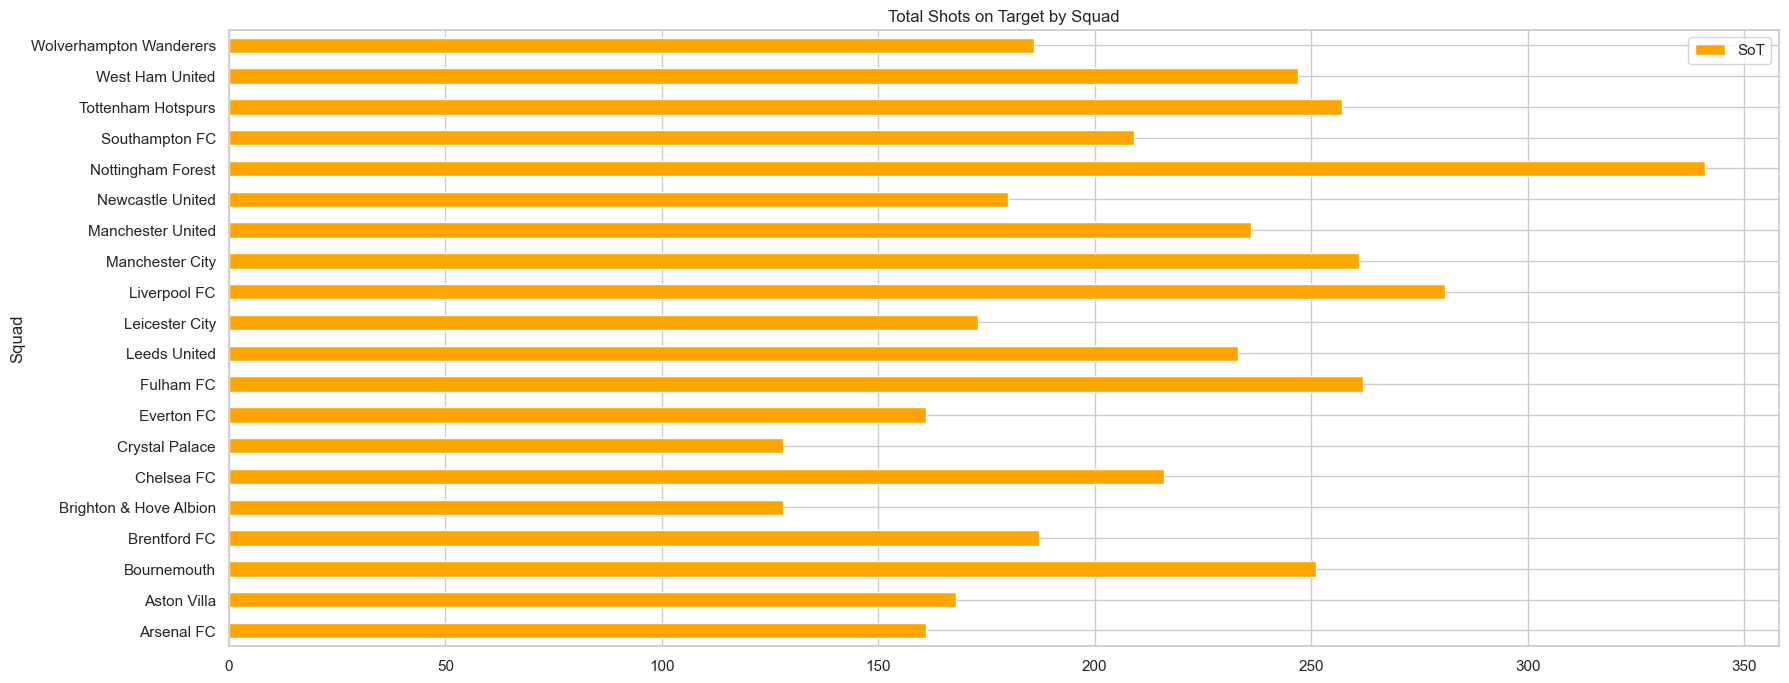

In [1245]:
#pd.DataFrame(pl_shooting.groupby(['Squad']).SoT.agg(sum)).plot.barh()
df = pd.DataFrame(pl_shooting.groupby(['Squad']).SoT.agg(sum))
df.plot.barh(color='orange', title='Total Shots on Target by Squad')

plt.show()

<AxesSubplot:ylabel='Frequency'>

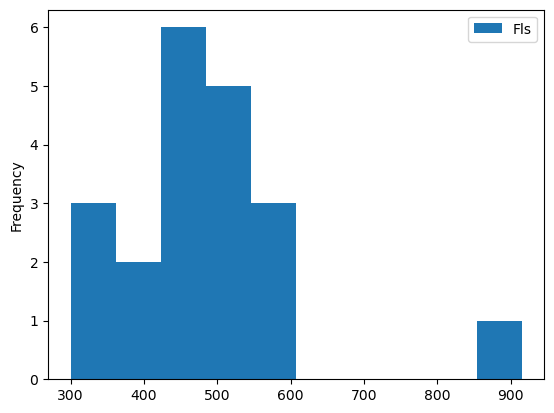

In [839]:
pd.DataFrame(pl_miscellaenous.groupby(['Squad']).Fls.agg(sum)).plot.hist()

<AxesSubplot:xlabel='Squad'>

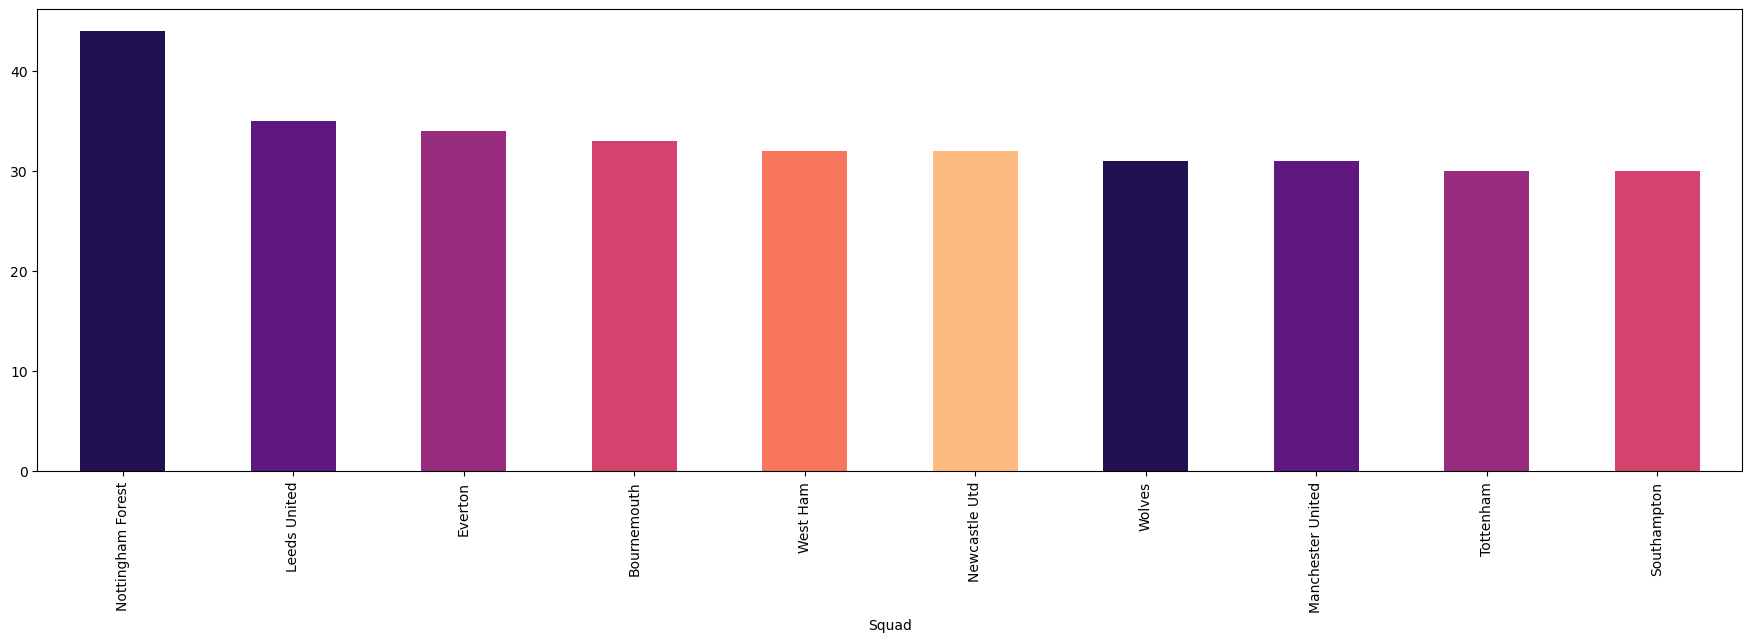

In [840]:
number_crdY = pl_miscellaenous.groupby(["Squad"]).TklW.size().sort_values(ascending = False)
number_crdY.head(10).plot(kind='bar', figsize=(22,6),color = sns.color_palette("magma"))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Arsenal FC'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Bournemouth'),
  Text(3, 0, 'Brentford FC'),
  Text(4, 0, 'Brighton & Hove Albion'),
  Text(5, 0, 'Chelsea FC'),
  Text(6, 0, 'Crystal Palace'),
  Text(7, 0, 'Everton FC'),
  Text(8, 0, 'Fulham FC'),
  Text(9, 0, 'Leeds United'),
  Text(10, 0, 'Leicester City'),
  Text(11, 0, 'Liverpool FC'),
  Text(12, 0, 'Manchester City'),
  Text(13, 0, 'Manchester United'),
  Text(14, 0, 'Newcastle United'),
  Text(15, 0, 'Nottingham Forest'),
  Text(16, 0, 'Southampton FC'),
  Text(17, 0, 'Tottenham Hotspurs'),
  Text(18, 0, 'West Ham United'),
  Text(19, 0, 'Wolverhampton Wanderers')])

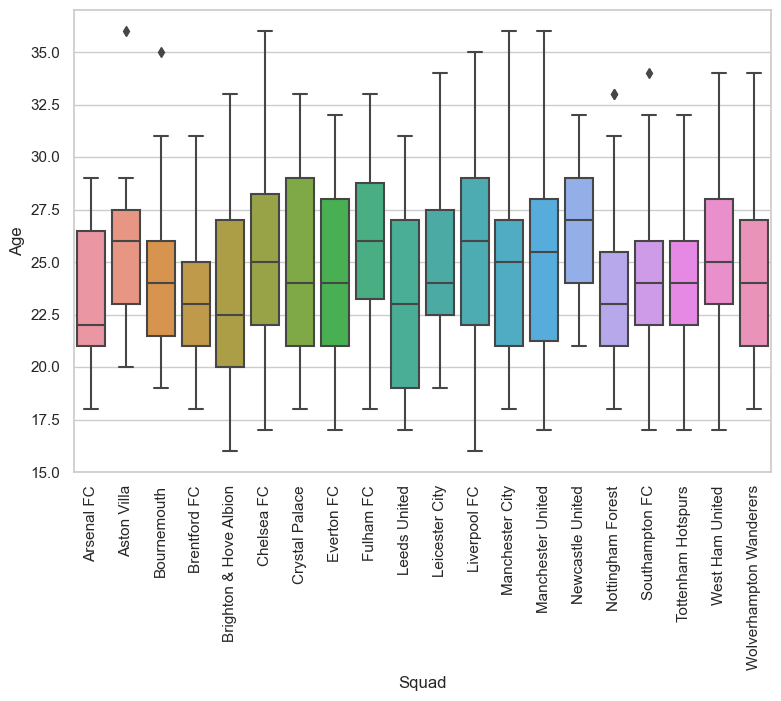

In [1246]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Squad", y="Age", data =pl_shooting)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Total goals per Team')

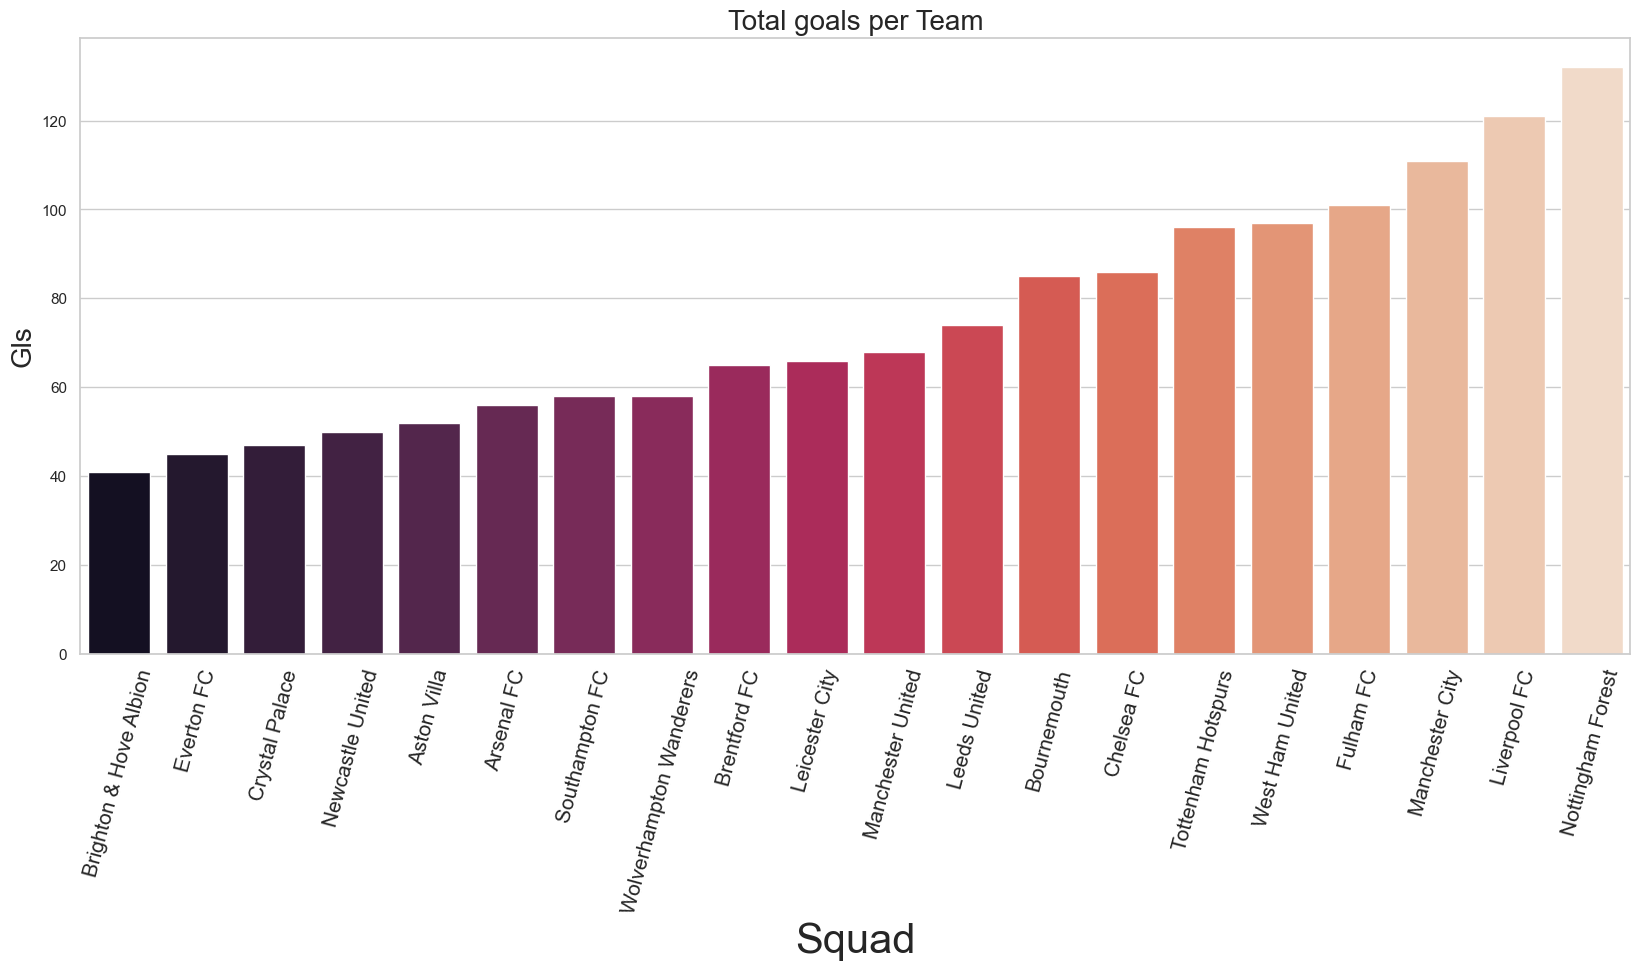

In [1248]:
#Total Goal by Club
goals_by_clubs = pd.DataFrame(pl_shooting.groupby('Squad', as_index=False) ['Gls'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='Squad',y='Gls',data=goals_by_clubs.sort_values(by="Gls"),palette='rocket') 
ax.set_xlabel("Squad",fontsize=30) 
ax.set_ylabel("Gls",fontsize=20)
plt.xticks(rotation=75, fontsize=15)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Total goals per Team', fontsize = 20)

In [1157]:
df_arrivals4 = df_arrivals.copy()

In [1158]:
df_arrivals4 = df_arrivals4.loc[(df_arrivals4["loan"] !=True)]

In [1166]:
df_arrivals4

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,False
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,False
2,Wesley Fofana,Defender,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,False
4,Casemiro,Midfielder,30,40,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70,False
5,Alexander Isak,Forward,22,30,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Ben Mee,Defender,32,2,England,Championship,Burnley FC,England,Premier League,Brentford FC,0,False
1185,Josh Bowler,Forward,23,2,England,Championship,Blackpool FC,England,Premier League,Nottingham Forest,2,False
1315,Fraser Forster,Goalkeeper,34,2,England,Premier League,Southampton FC,England,Premier League,Tottenham Hotspur,0,False
1654,Joel Robles,Goalkeeper,32,1,Spain,LaLiga,Real Betis Balompié,England,Premier League,Leeds United,0,False


In [1167]:
df_2 = df.copy()

In [1169]:
df_2 = df_2.loc[(df_2["loan"] !=True)]


In [1180]:
df_2.head()
league = ["Premier League", "Serie A","LaLiga","Bundesliga"]
#df_2 = df2.loc[df_2[["Premier League", "Serie A","LaLiga","Bundesliga"]] & (df_2["loan"] !=True)]
filtre = df_2['league_to'].isin(league)
df_2 = df2.loc[league & (df_2["loan"] !=True)]

ValueError: operands could not be broadcast together with shapes (4,) (1449,) 

Text(0.5, 1.0, 'Total fees per league')

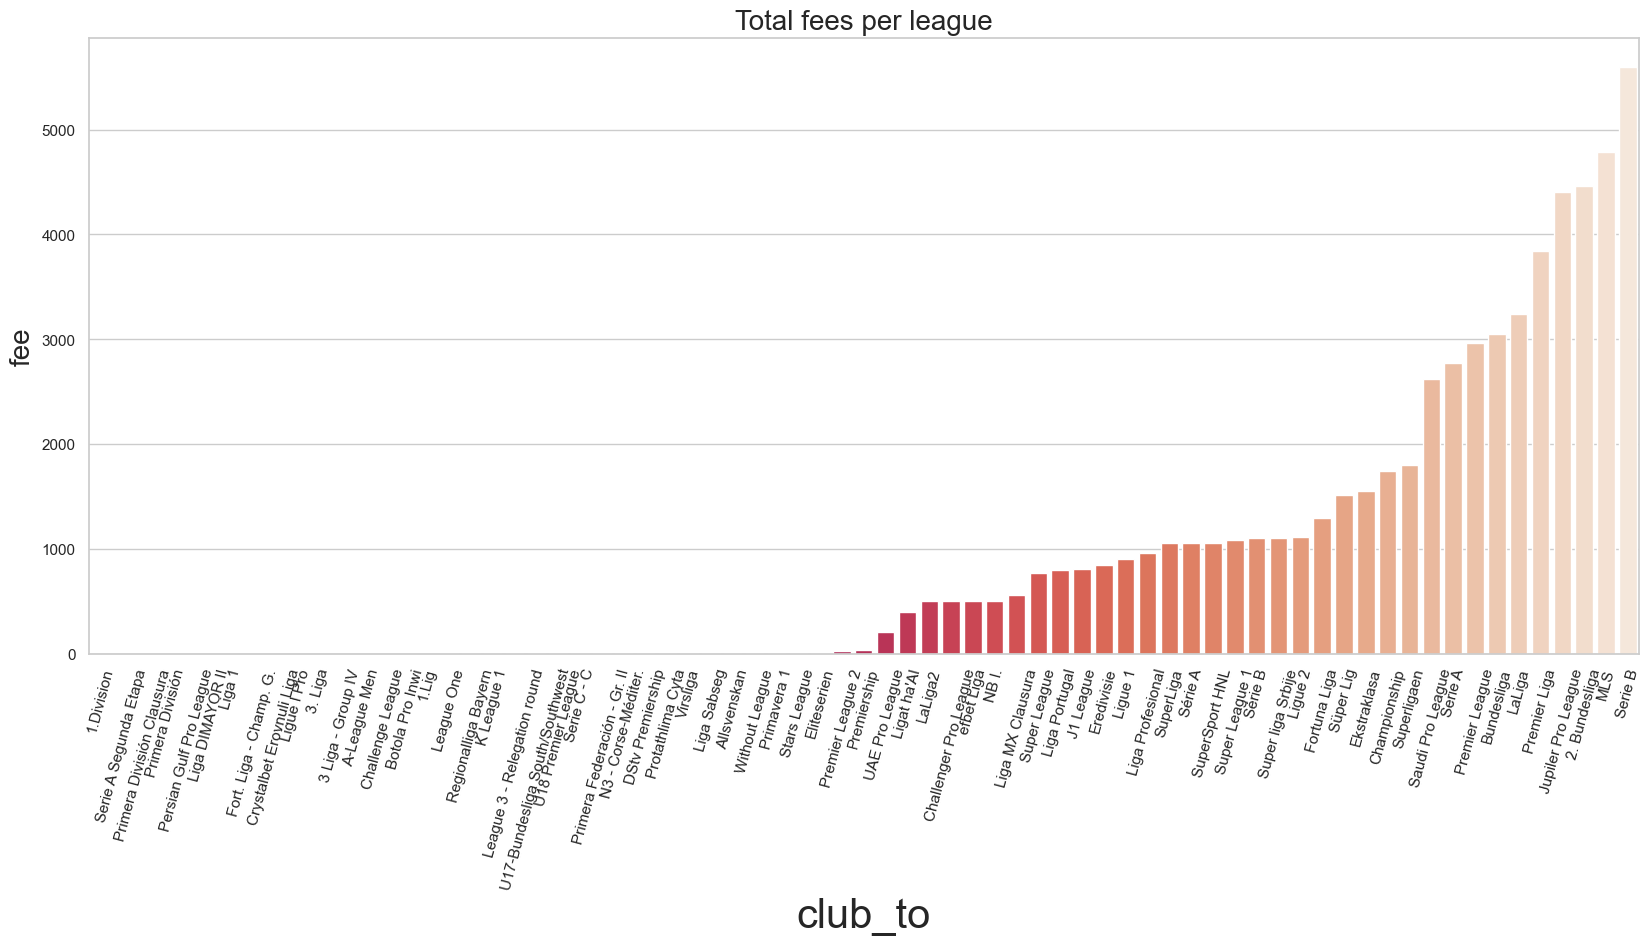

In [1174]:
goals_by_clubs = pd.DataFrame(df_2.groupby('league_to', as_index=False) ['fee'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='league_to',y='fee',data=goals_by_clubs.sort_values(by="fee"),palette='rocket') 
ax.set_xlabel("club_to",fontsize=30) 
ax.set_ylabel("fee",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Total fees per league', fontsize = 20)

Text(0.5, 1.0, 'Total fees per Team')

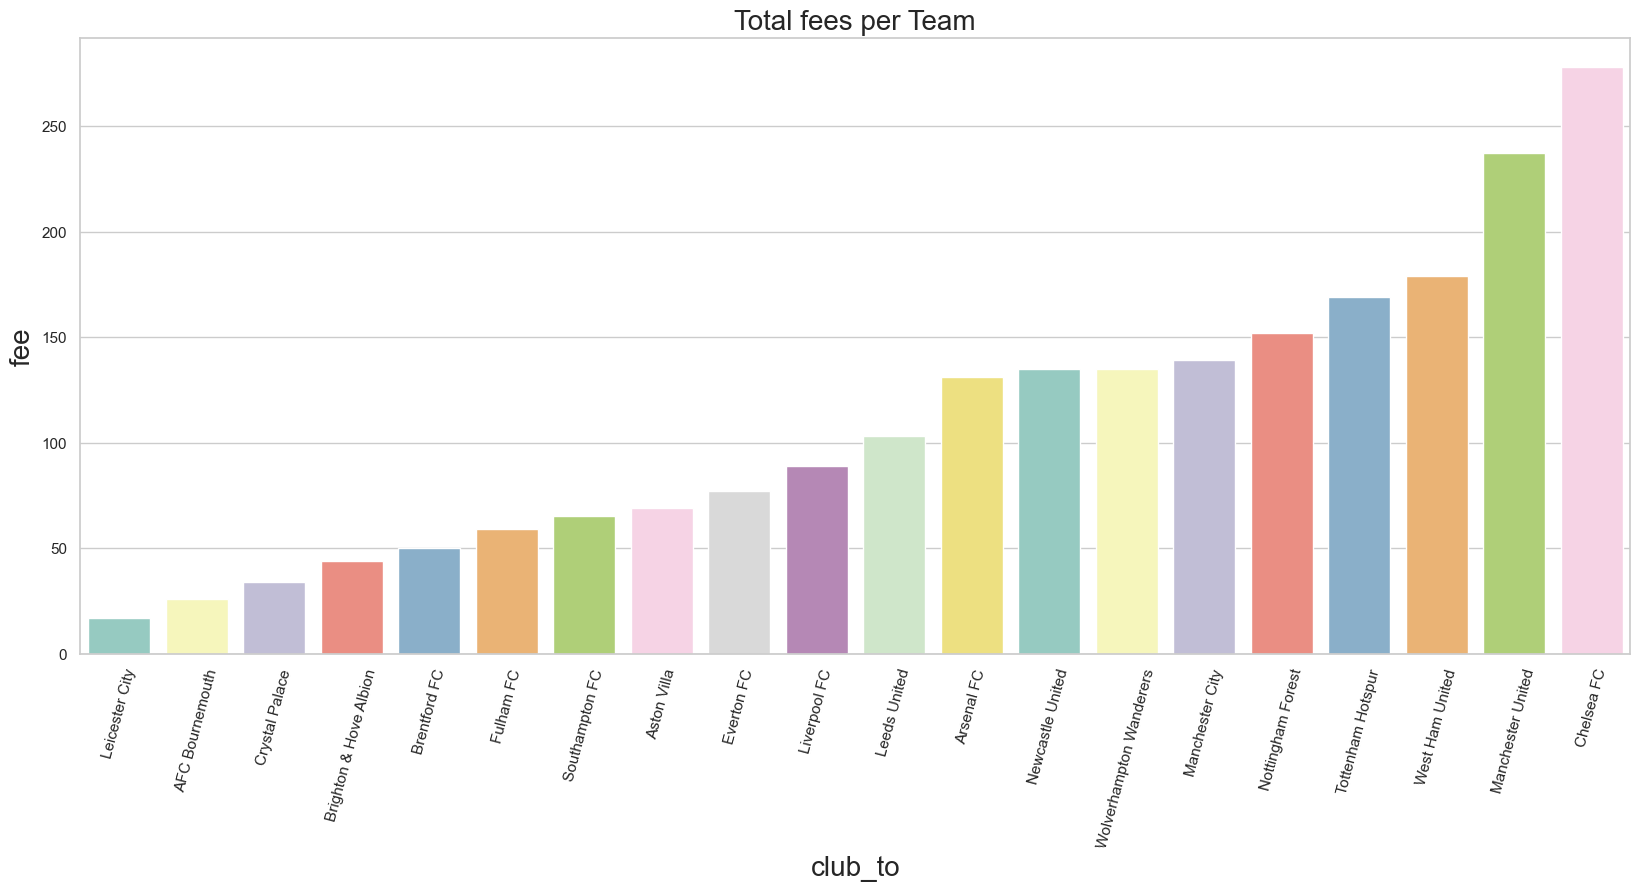

In [1253]:

goals_by_clubs = pd.DataFrame(df_arrivals4.groupby('club_to', as_index=False) ['fee'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x='club_to',y='fee',data=goals_by_clubs.sort_values(by="fee"),palette='Set3') 
ax.set_xlabel("club_to",fontsize=20) 
ax.set_ylabel("fee",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Total fees per Team', fontsize = 20)

In [1163]:
top10_market_value = df_arrivals[['name','club_to','market_value','age']].nlargest(n=10, columns ='market_value',)

In [1181]:
top10_market_value

,name,club_to,market_value,age
0,Erling Haaland,Manchester City,150,21
7,Raheem Sterling,Chelsea FC,70,27
16,Darwin Núñez,Liverpool FC,55,23
18,Gabriel Jesus,Arsenal FC,50,25
20,Kalvin Phillips,Manchester City,50,26
14,Richarlison,Tottenham Hotspur,48,25
19,Cristian Romero,Tottenham Hotspur,48,24
2,Wesley Fofana,Chelsea FC,40,21
4,Casemiro,Manchester United,40,30
32,Gonçalo Guedes,Wolverhampton Wanderers,40,25


In [1183]:
top10_goals = pl_shooting[["Player","Gls","Pos"]].nlargest(n=10, columns='Gls')
top10_goals

,Player,Gls,Pos
218,Aleksandar Mitrović,43,Forward
52,Dominic Solanke,29,Forward
316,Darwin Núñez,26,Forward
329,Mohamed Salah,23,Forward
530,Son Heung-min,23,Midfielder
344,Erling Haaland,22,Forward
378,Cristiano Ronaldo,18,Forward
516,Harry Kane,17,Forward
332,Sadio Mané,16,Forward
432,Brennan Johnson,16,Forward


In [ ]:
#head 
#describe
#info
#unique - modify position
#unique - modify club name
#list of columns elements
#column to drop
#convert type data



In [1191]:
#Saving files as CSV

#PL History records
#df_plmatches.to_csv("plmatches_report.csv")

#All transfers history
#df.to_csv("transfers_history_report.csv")

#All PL Departures
#df_departures.to_csv("df_departures_report.csv")

#All PL Arrivals
#df_arrivals.to_csv("df_arrivals_report.csv")

#PL Players Standard Stats
#pl_standard.to_csv("pl_standard_stats_report.csv")

#PL Players Shooting Stats
#pl_shooting.to_csv("pl_shooting.csv")

#PL Players Shooting Stats
#pl_miscellaenous.to_csv("pl_miscellaenous.csv")

# EXPORTING DATA TO SQL

In [1185]:
sql_pass = getpass.getpass()

········


In [1187]:
#MySQL database
connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/footballbase'
engine = create_engine(connection_string)

In [1193]:
df_plmatches.to_sql('plmatches', engine, 
                          'footballbase', if_exists='replace', index=False)

12026

In [1194]:
df.to_sql('transfers', engine, 
                          'footballbase', if_exists='replace', index=False)

2000

In [1195]:
pl_standard.to_sql('standard_stats', engine, 
                          'footballbase', if_exists='replace', index=False)

596

In [1196]:
pl_shooting.to_sql('shooting_stats', engine, 
                          'footballbase', if_exists='replace', index=False)

553

In [1197]:
pl_miscellaenous.to_sql('miscellaenous_stats', engine, 
                          'footballbase', if_exists='replace', index=False)

596